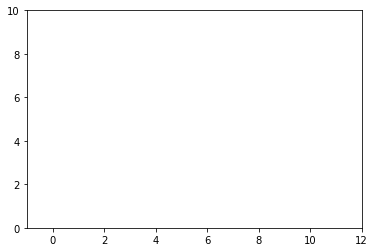

In [3]:
# -*- coding: utf-8 -*-

from __future__ import print_function
import numpy as np
from helper import leer_landmarks, leer_sensor_odom, plot_robot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#%matplotlib qt
fig = plt.figure()
plt.axis([-1, 12, 0, 10])
# plt.ion(): #plt.show()


def prediccion_ekf(odom, X, P):
    """
    Estimación del estado del robot (X) y su matriz de covarianza (P) según
    el modelo de movimiento

    X: vector 3x1 que representa (x,y,theta) del robot
    P: matriz 3x3 que representa la covarianza

    """

    # Estado del robot
    x = X[0]; y = X[1]; theta = X[2]
    # Valores delta del modelo
    delta_rot1 = odom['r1']
    delta_trans = odom['t']
    delta_rot2 = odom['r2']

    """
    Completar la implementación debajo de este comentario
    """

    # Ruido del movimiento: R (completar)

    R = np.array([[0.2, 0, 0],
                  [0, 0.2, 0],
                  [0,0,0.2]])
    # Movimiento sin ruido (completar)
    """
    El modelo de movimiento del robot según la odometría
    tiene entrada u, donde se representa porque la secuencia
    de giro (delta_rot1), desplazamiento(delta_trans) y
    giro (delta_rot2).
    """
    x = x + delta_trans*np.cos(theta+delta_rot1)
    y = y + delta_trans*np.sin(theta+delta_rot1)
    theta = theta + delta_rot1 + delta_rot2
    X = np.array([x,y,theta])
    # Jacobiano con respecto al estado (completar)
    Jacob = np.array([[1,0,-delta_trans*np.sin(theta+delta_rot1)],
                      [0,1,delta_trans*np.cos(theta + delta_rot1)],
                      [0,0,1]])

    # Jacobiano de la matriz de estado con respecto al error
    Fe = np.array([[1,0,0],
                   [0,1,0],
                   [0,0,1]])
    P = Jacob.dot(P).dot(Jacob.T) + Fe.dot(R).dot(Fe.T)
    return X, P


def correccion_ekf(sensor, X, P, landmarks):
    """
    Actualización de la estimación usando el modelo del sensor (con solo
    mediciones de rango)

    X: vector 3x1 que representa (x,y,theta) del robot
    P: matrix 3x3 que representa la covarianza

    """

    # Estado del robot
    x = X[0]; y = X[1];
    # Landmarks medidos (ids) y sus rangos
    ids = sensor['id']
    rangos = sensor['rango']

    """
    Completar la implementación debajo de este comentario
    """

    # Mediciones de rango para cada landmark (función h)
    H = []; Z = []; h = []
    for i in range(len(ids)):
        # Medición
        Z.append(rangos[i])
        # Obtención de coordenadas x, y para cada landmark observado
        # (en el sistema inercial)
        lm_id = ids[i]
        lx = landmarks[lm_id][0]
        ly = landmarks[lm_id][1]

        # Calcular la medición esperada de rango para cada landmark (lx, ly)
        # *** Completar h_i ***
        """
        Función h que obtiene el rango estimado a partir de la predicción del estado
        y la posición real dee los landmarks.
        """
        q = (lx-x)**2 + (ly-y)**2
        h_i = np.sqrt(q)

        # Calcular cada fila de la matriz H (derivada de h_i con respecto al
        # estado), para cada medición de landmark (lx, ly)
        # H_i: vector de 1x3
        # *** Completar H_i ***
        """
        La Matriz H es el jacobiano de la función h con respecto al estado.
        """
        H_i = (1/q)*np.array([-h_i*(lx-x),-h_i*(ly-y),0])

        # Incrementar los elementos (filas) de la matriz H y las mediciones
        H.append(H_i); h.append(h_i)

    # Covarianza de las mediciones (completar)
    "Conversión de la matrices H y h a numpy / Inicializar matriz de covarianza"
    Q = 0.5*np.eye(len(H))
    H = np.array(H)
    h = np.array(h)
    # Ganancia de Kalman (completar)
    temp = Q + H.dot(P).dot(H.T)
    K = P.dot(H.T).dot(np.linalg.inv(temp))

    # Corrección de la media y la covarianza (completar)
    X = X + K.dot(Z-h)
    P = (np.eye(len(K)) - K.dot(H)).dot(P)
    return X, P

Leyendo posiciones de landmarks
Leyendo datos del sensor


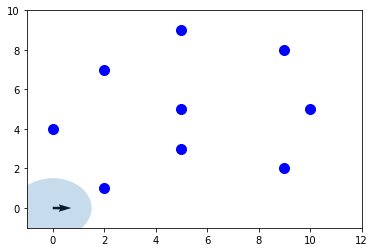

[0.09911376 0.01008209 0.10223592]


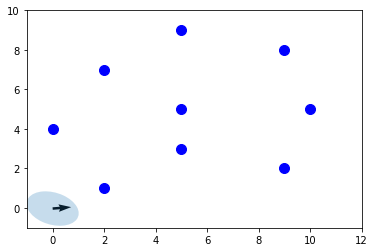

[ 0.09551151 -0.00624249  0.2026026 ]


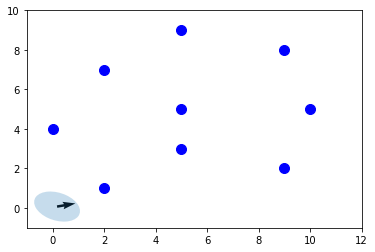

[0.26415201 0.10540213 0.32063274]


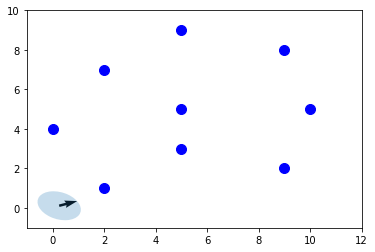

[0.3429605  0.15664599 0.42519335]


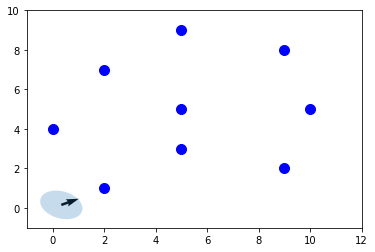

[0.4205698  0.21009036 0.52577087]


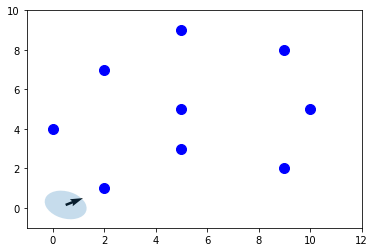

[0.58694692 0.21016772 0.57709886]


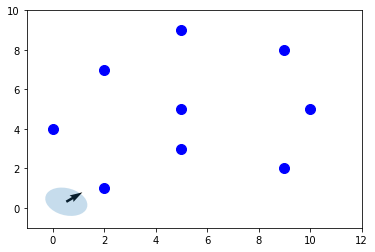

[0.60093255 0.38582282 0.7544294 ]


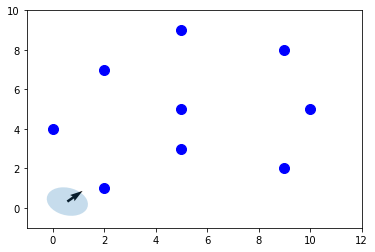

[0.63539551 0.40164052 0.83985321]


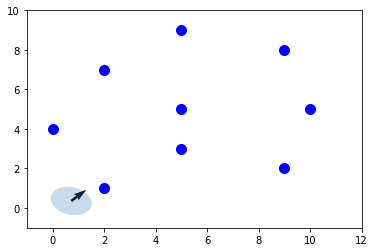

[0.78747948 0.4360406  0.87462862]


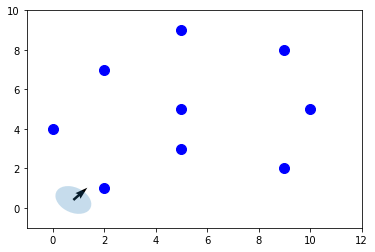

[0.86009698 0.48935382 0.9549837 ]


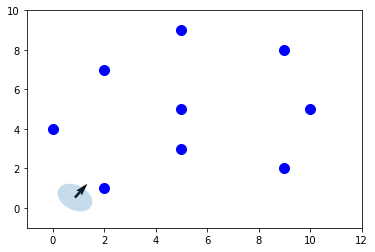

[0.91277899 0.6182841  1.06785721]


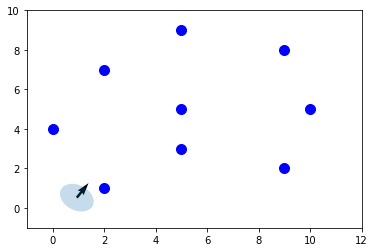

[0.98568185 0.61299599 1.06675798]


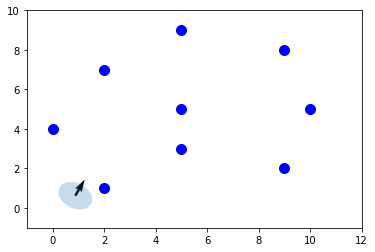

[0.90918849 0.71983793 1.25030482]


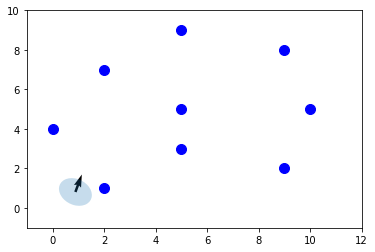

[0.89896581 0.91099085 1.39608471]


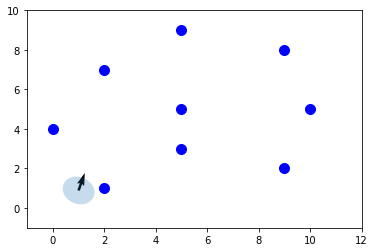

[1.02044003 0.98679044 1.40376795]


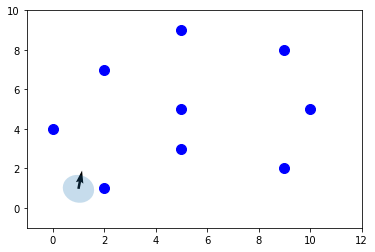

[1.00484048 1.07134134 1.52005439]


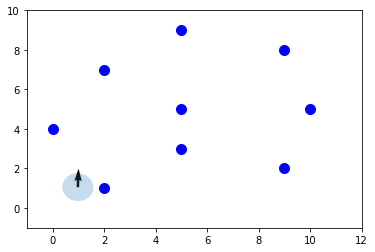

[0.97960494 1.15502003 1.54435577]


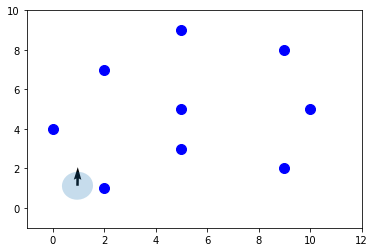

[0.96342591 1.22681196 1.56007682]


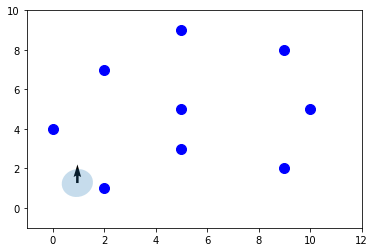

[0.95706108 1.36497903 1.56606919]


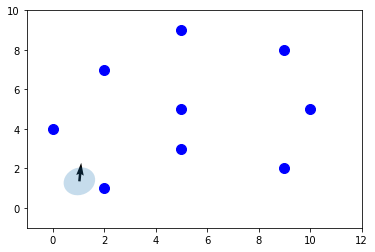

[1.04352357 1.45048732 1.49659948]


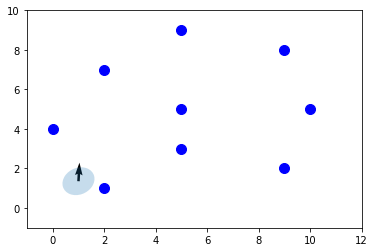

[1.00490848 1.45644737 1.52988211]


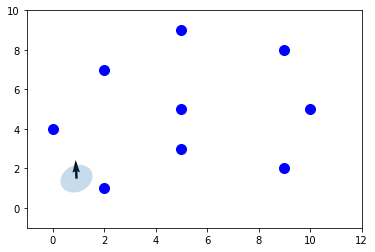

[0.92028086 1.58743032 1.60188316]


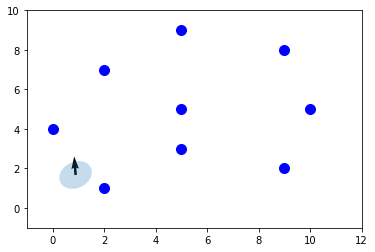

[0.88391794 1.77400099 1.63068981]


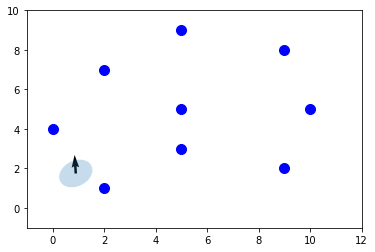

[0.89166012 1.84695407 1.61855013]


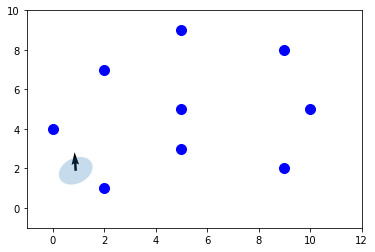

[0.88828889 1.98452876 1.61640475]


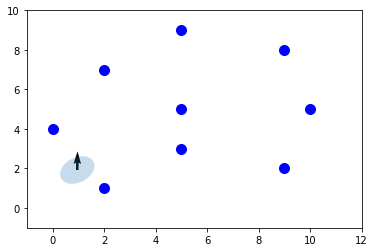

[0.9544819  2.02597851 1.55975692]


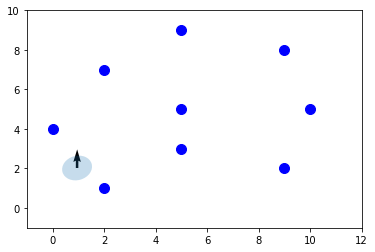

[0.94654001 2.12550821 1.56717744]


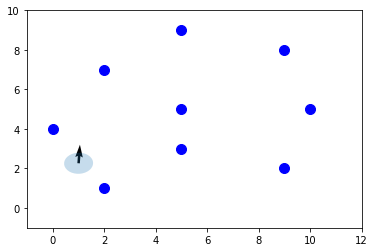

[1.01111653 2.36483343 1.51612976]


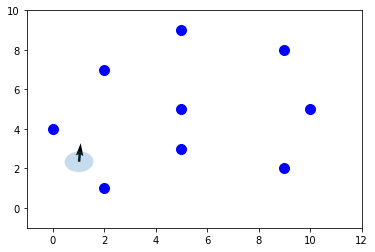

[1.03052794 2.44144021 1.50402768]


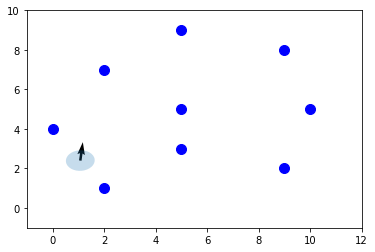

[1.08183142 2.50039085 1.46403442]


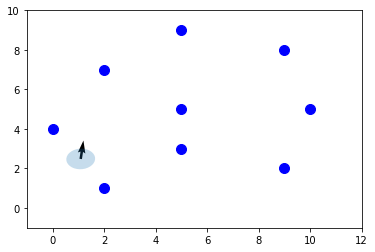

[1.09889393 2.58238754 1.45619676]


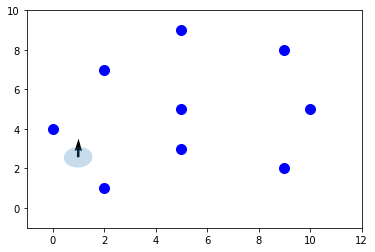

[0.98957013 2.66833137 1.55558816]


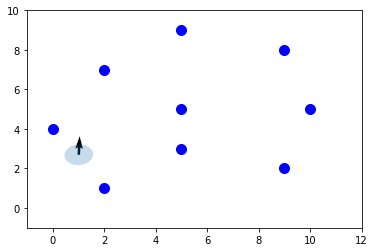

[1.01669402 2.79472135 1.53497341]


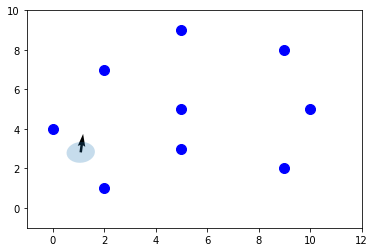

[1.09797682 2.91646976 1.47281274]


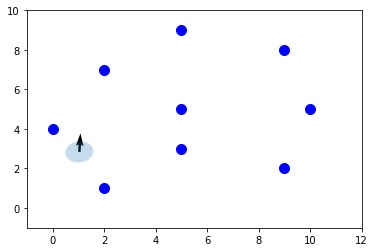

[1.03885677 2.93859083 1.52463011]


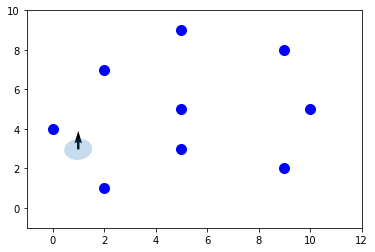

[0.99121056 3.06633262 1.56953804]


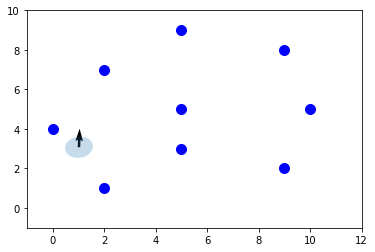

[1.02228855 3.17622941 1.54420393]


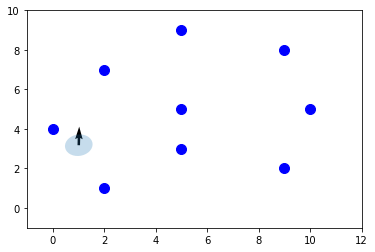

[1.01399905 3.27734114 1.55350612]


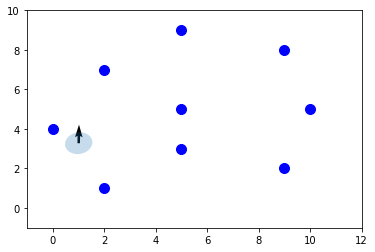

[1.01051021 3.37838042 1.55870274]


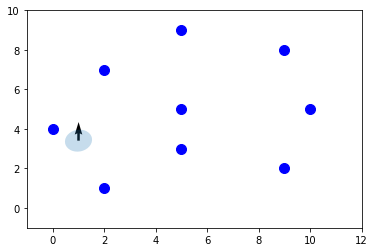

[1.00212018 3.50935891 1.56774433]


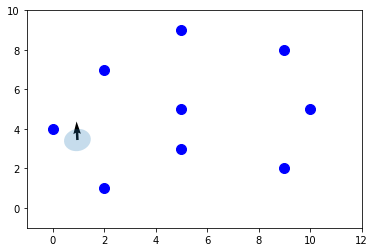

[0.95564595 3.54008112 1.60593669]


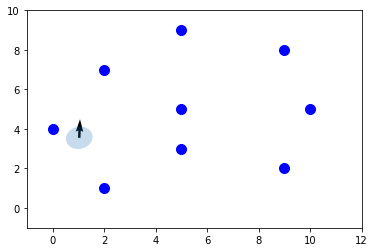

[1.03303188 3.6518968  1.53869592]


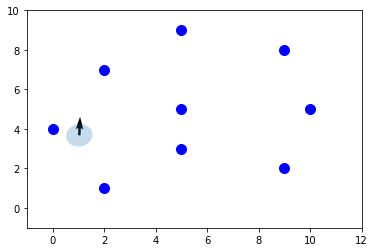

[1.0360289  3.77876752 1.53967095]


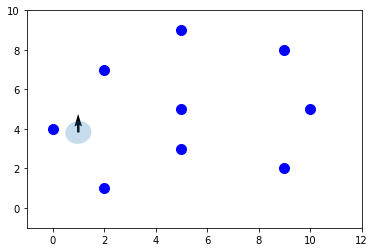

[0.99337126 3.92279173 1.57864519]


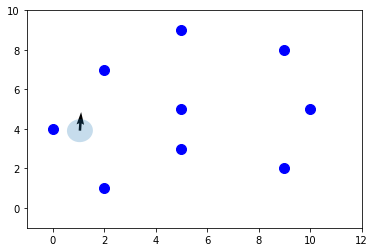

[1.06195077 4.01460847 1.52169668]


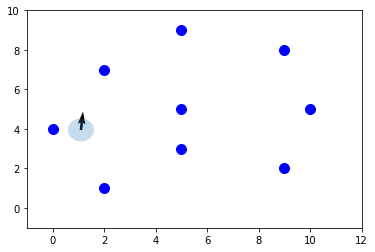

[1.10593495 4.04844074 1.48727194]


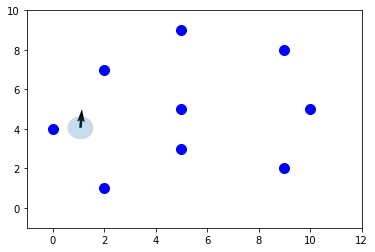

[1.08467166 4.15842729 1.51329951]


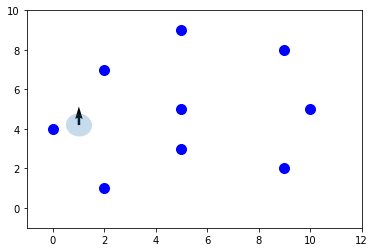

[1.01937369 4.29718353 1.57317352]


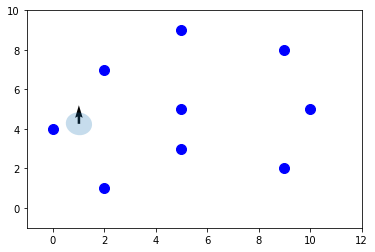

[1.01842639 4.35936895 1.57375563]


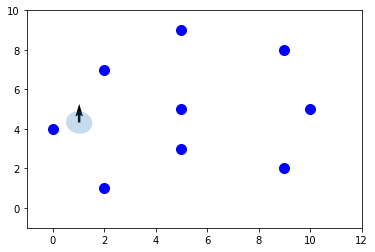

[1.02657916 4.42825771 1.56667853]


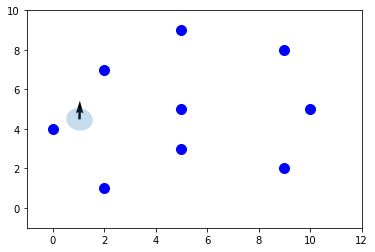

[1.04116362 4.58504188 1.55473643]


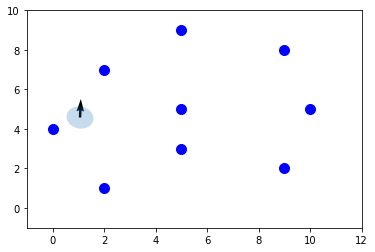

[1.06398673 4.67688415 1.53745777]


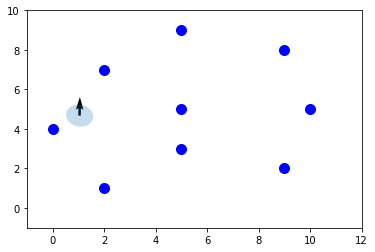

[1.0435655  4.77449141 1.55652137]


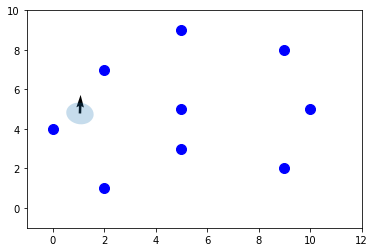

[1.06021659 4.88441434 1.54511052]


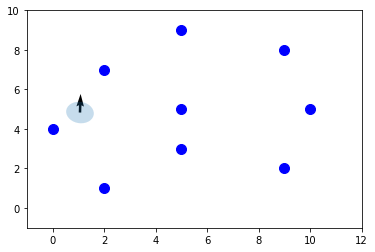

[1.06151566 4.93134018 1.54497431]


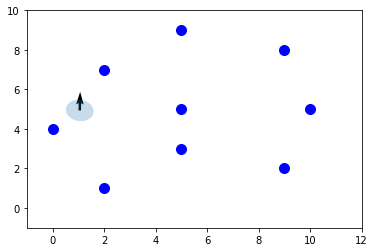

[1.05212323 5.03591908 1.55579198]


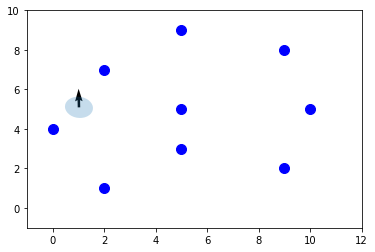

[1.01802759 5.19278633 1.5866074 ]


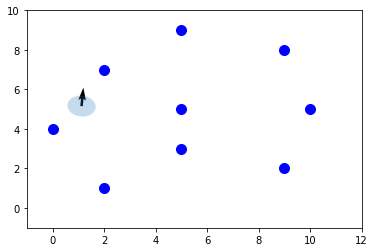

[1.12720874 5.25555314 1.49455233]


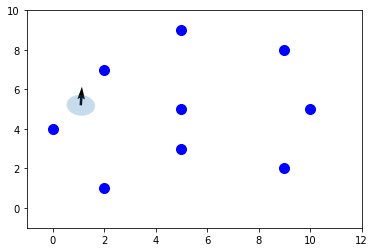

[1.09581341 5.29699994 1.52530317]


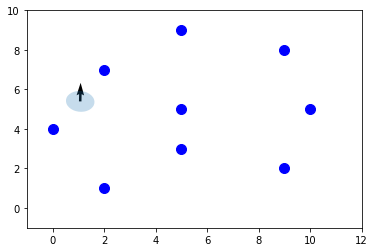

[1.0696969  5.49425699 1.55452706]


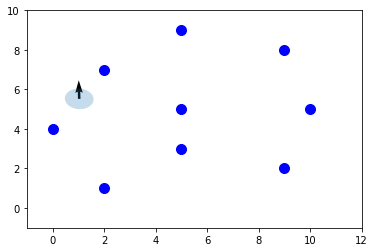

[1.02745746 5.62141121 1.58945573]


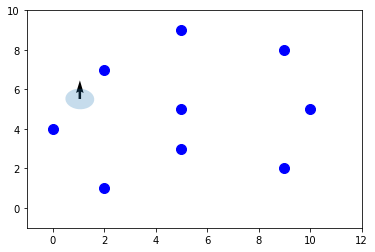

[1.05308674 5.61607627 1.56689003]


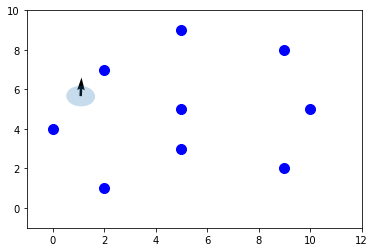

[1.08971954 5.76007253 1.53623851]


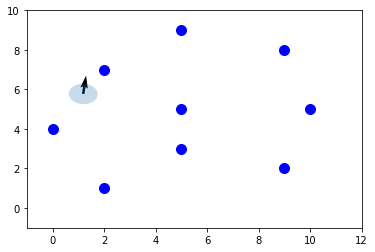

[1.19526417 5.86997658 1.45280059]


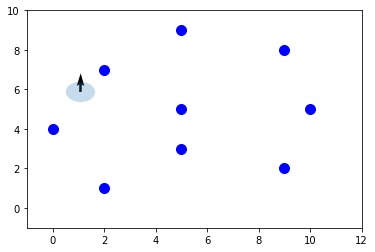

[1.07727646 5.97416024 1.55926257]


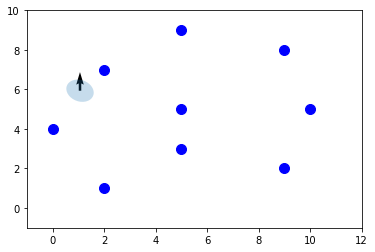

[1.06059399 6.03512299 1.57225344]


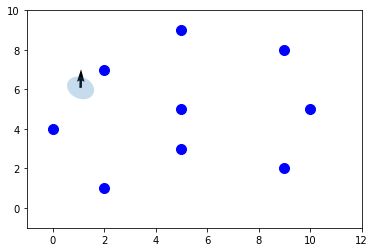

[1.08484384 6.17900163 1.55166934]


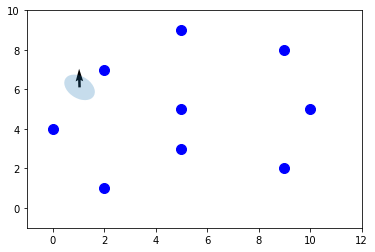

[1.04085642 6.20442338 1.58951425]


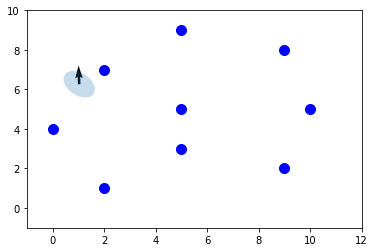

[1.02635882 6.36406488 1.59886426]


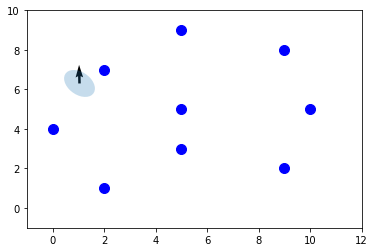

[1.03872947 6.40183596 1.58887515]


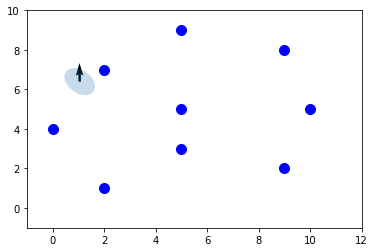

[1.04663401 6.49354301 1.58091894]


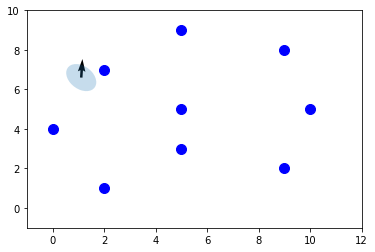

[1.11377748 6.69925059 1.49214952]


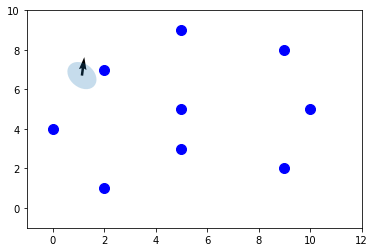

[1.14572954 6.79954576 1.44157612]


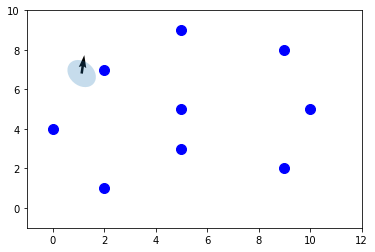

[1.13573432 6.90253733 1.43310715]


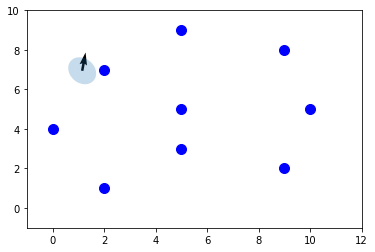

[1.15987593 7.04345001 1.39925657]


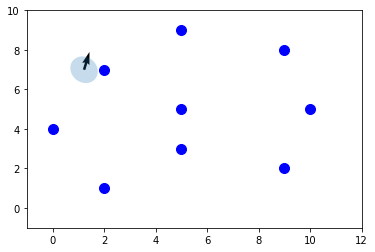

[1.24151201 7.09353716 1.31220158]


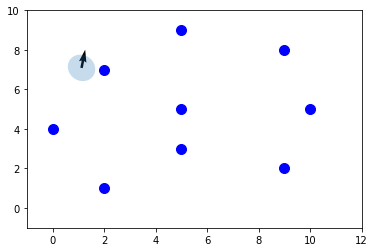

[1.13545914 7.18774478 1.38778167]


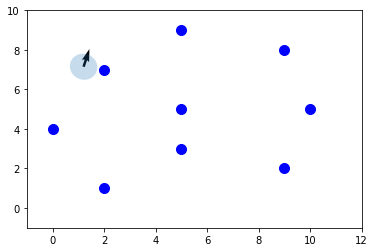

[1.22553841 7.2459543  1.2937217 ]


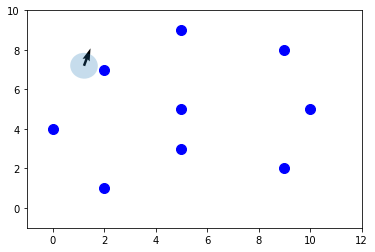

[1.24393227 7.29259159 1.26175716]


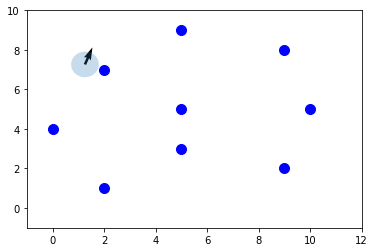

[1.28577361 7.35910459 1.21738561]


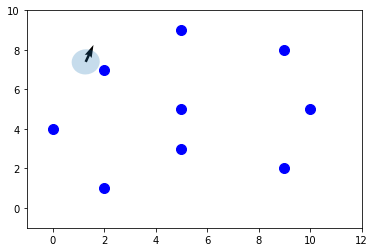

[1.31534642 7.48827892 1.20090298]


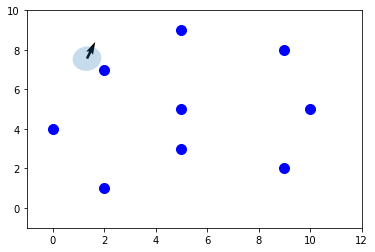

[1.36773919 7.65423217 1.18043959]


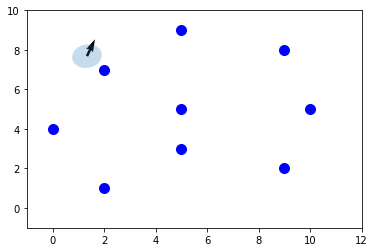

[1.36573896 7.77764796 1.19103626]


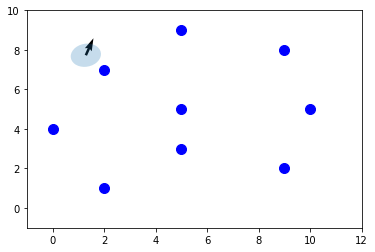

[1.32027052 7.8236358  1.21056792]


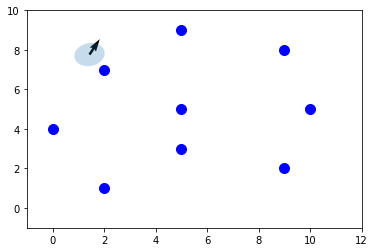

[1.47417092 7.85077667 1.07011826]


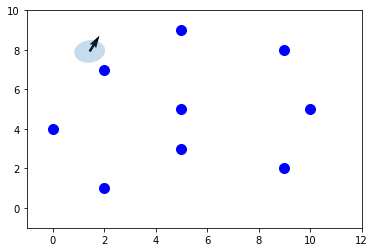

[1.48042725 8.01257364 1.09982876]


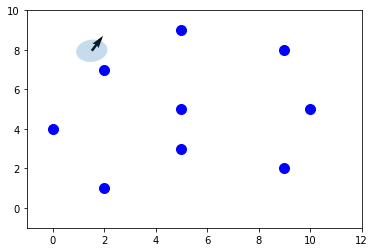

[1.57083032 8.04414577 1.01586107]


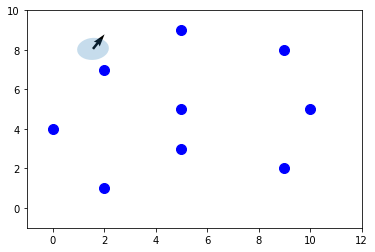

[1.61736539 8.13555616 0.99452375]


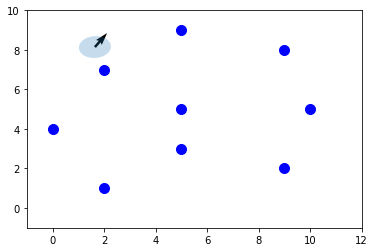

[1.69575946 8.22584363 0.9518332 ]


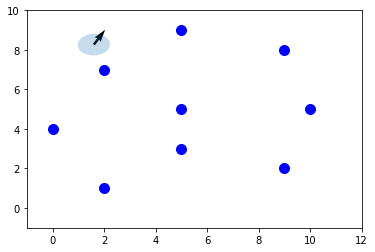

[1.65048722 8.35407224 1.01415692]


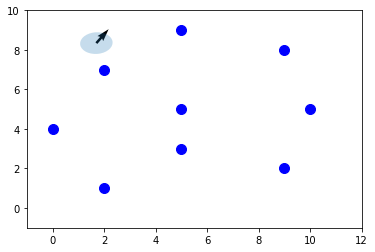

[1.75154415 8.4256862  0.94860982]


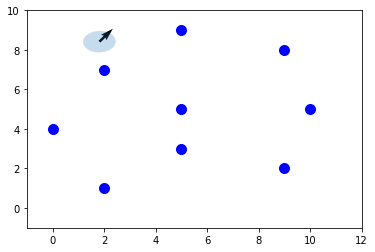

[1.87657952 8.4938407  0.86811069]


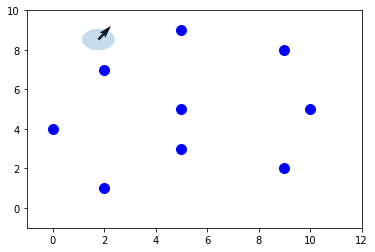

[1.83320542 8.60439187 0.92532291]


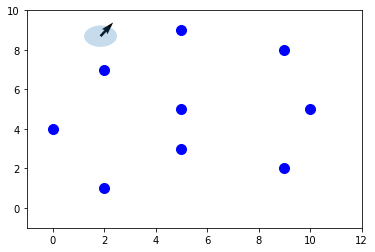

[1.91713763 8.77603963 0.92783001]


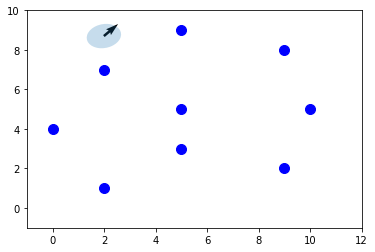

[2.05575544 8.77309399 0.80556366]


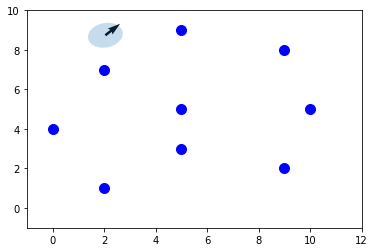

[2.11604311 8.81129559 0.76326242]


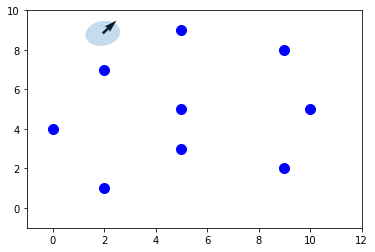

[2.01029952 8.9128982  0.85578928]


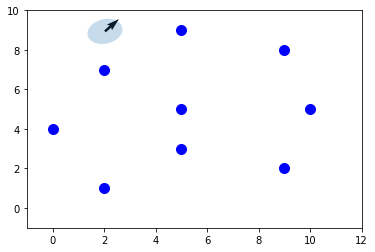

[2.09538818 9.00993938 0.82747376]


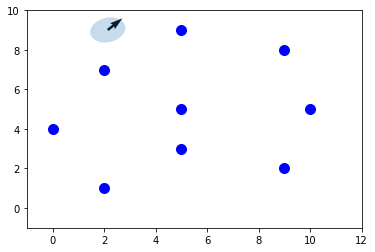

[2.20779877 9.07995565 0.77094812]


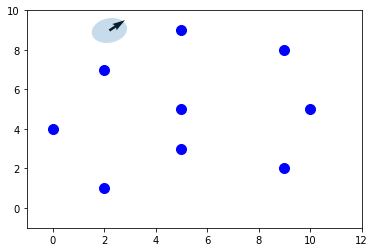

[2.27809133 9.04707725 0.68306477]


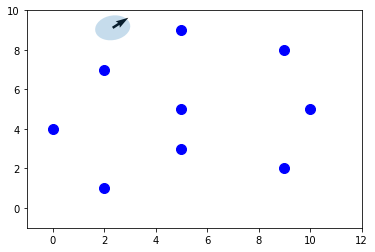

[2.40667991 9.18054377 0.66904183]


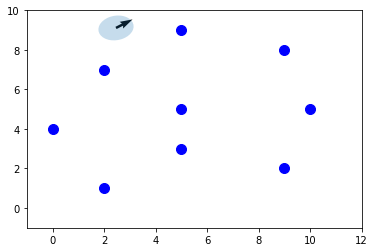

[2.54130471 9.16536605 0.56124997]


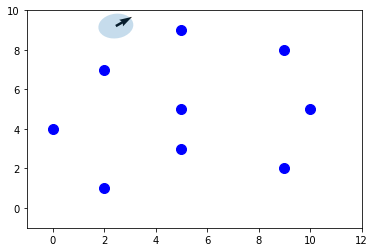

[2.53278616 9.26483802 0.60730215]


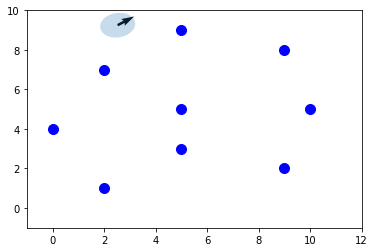

[2.60532303 9.30642535 0.57363629]


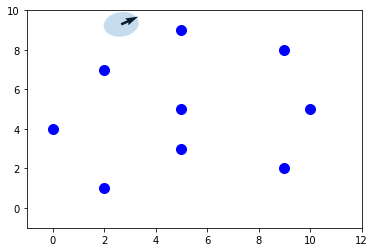

[2.74667983 9.34193151 0.50641859]


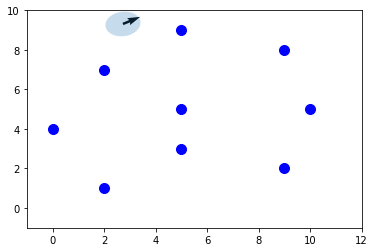

[2.81666536 9.35878558 0.46198203]


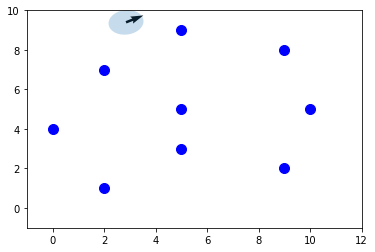

[2.93587408 9.43999625 0.44648007]


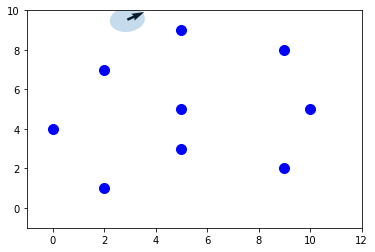

[2.98413968 9.57745499 0.50261914]


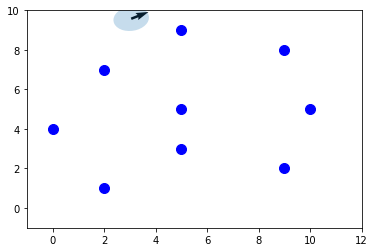

[3.13775357 9.62002892 0.4438253 ]


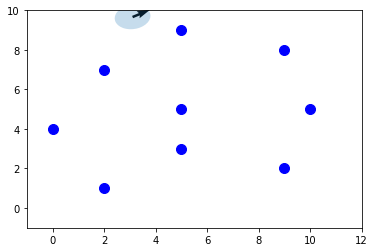

[3.19016215 9.7091713  0.46109487]


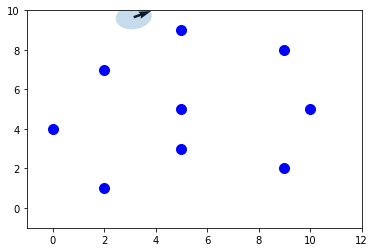

[3.2377982  9.69368444 0.40138876]


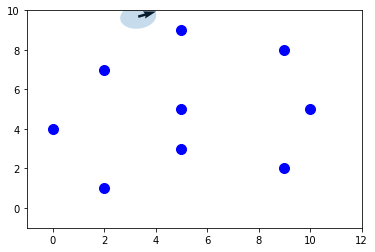

[3.41391088 9.71536613 0.33050687]


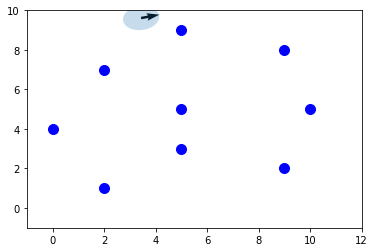

[3.52914983 9.63277074 0.20677594]


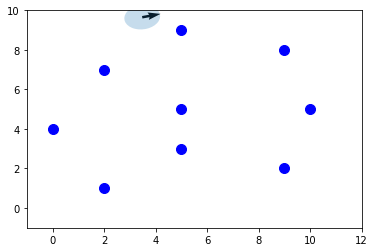

[3.57368397 9.67337458 0.20590461]


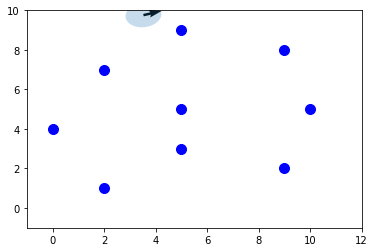

[3.62056232 9.785728   0.26109393]


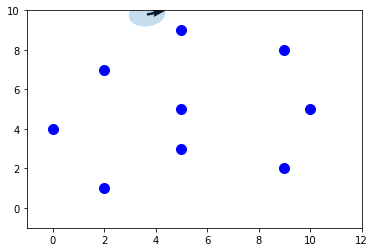

[3.75679068 9.81473344 0.22618473]


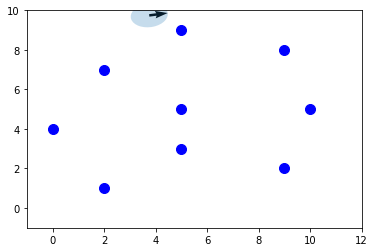

[3.84709593 9.7603808  0.13695513]


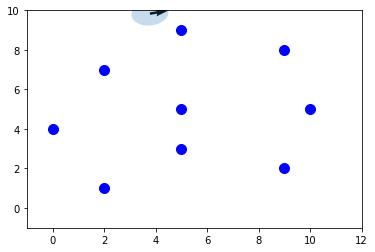

[3.87270619 9.85445829 0.18469855]


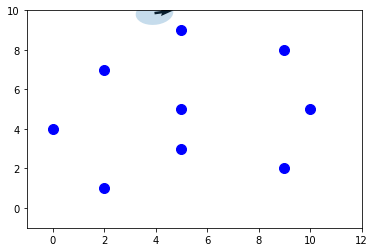

[4.05210949 9.87579027 0.14599974]


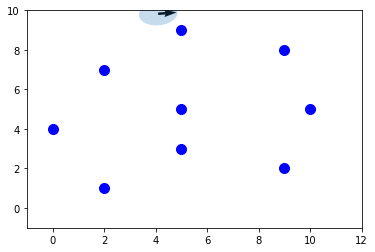

[4.19497514 9.83594541 0.0663679 ]


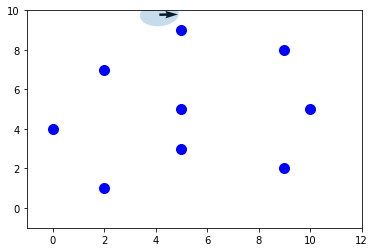

[ 4.24005731e+00  9.78093839e+00 -8.07838276e-03]


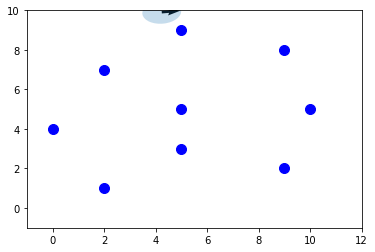

[4.33416641 9.91685244 0.07523787]


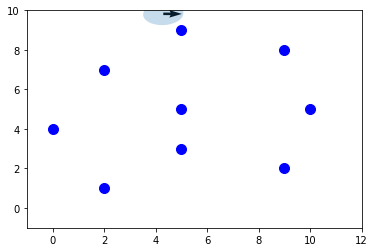

[ 4.39367981e+00  9.82373794e+00 -5.03370089e-03]


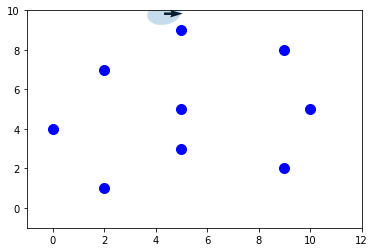

[4.42313938e+00 9.82990816e+00 2.89216916e-03]


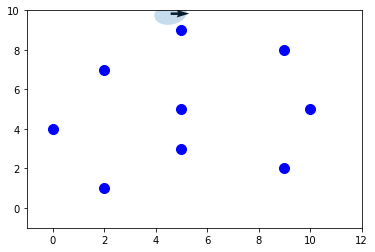

[4.67925356e+00 9.83219860e+00 2.68966836e-03]


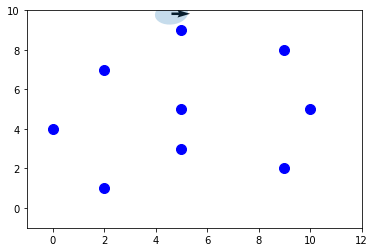

[ 4.71143264e+00  9.82759514e+00 -3.49289344e-04]


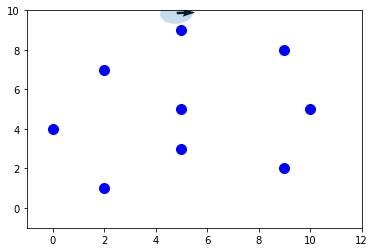

[4.91461664 9.87021905 0.03470603]


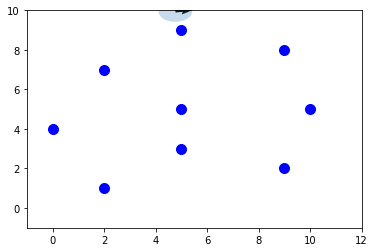

[4.86294342 9.96651647 0.11442137]


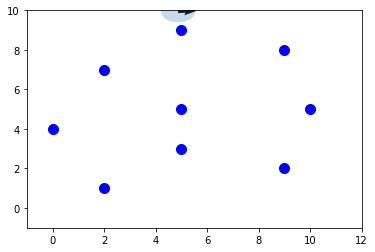

[4.9691722  9.93055948 0.07518172]


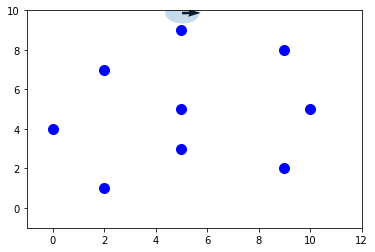

[5.12377499 9.86449273 0.01046067]


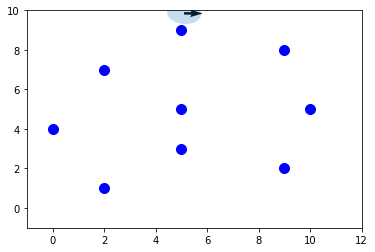

[ 5.20097950e+00  9.84704715e+00 -4.56379297e-03]


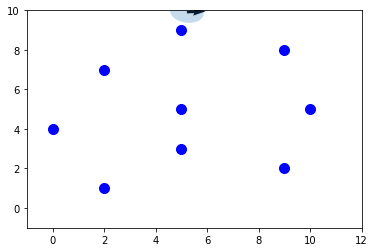

[5.31046299 9.9154577  0.05244992]


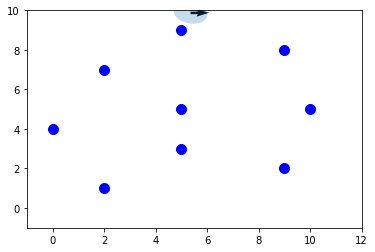

[5.45240473 9.87228209 0.01109551]


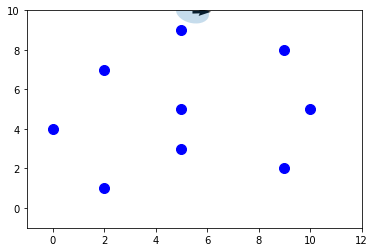

[5.52644546 9.90442471 0.03642684]


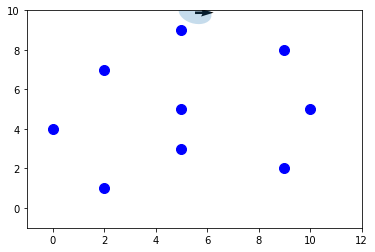

[5.62650708 9.87759166 0.01205379]


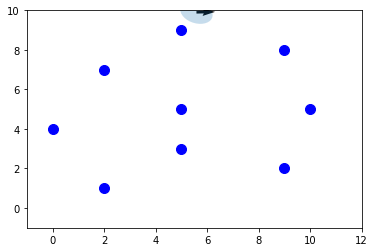

[5.68154777 9.90350862 0.03246153]


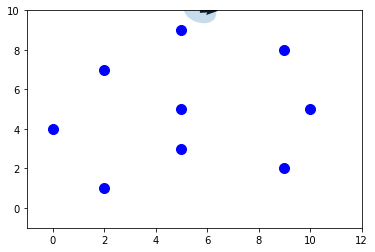

[5.8147082  9.94436196 0.06302494]


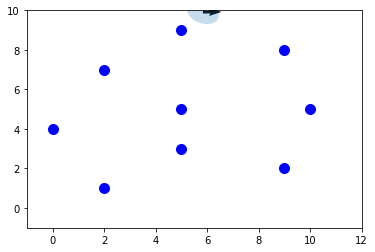

[5.93307771 9.90523754 0.02433327]


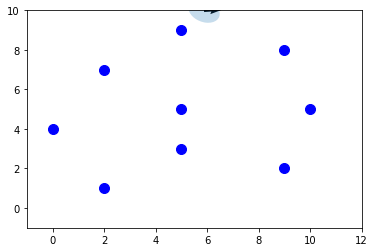

[5.97451226 9.98642884 0.08900372]


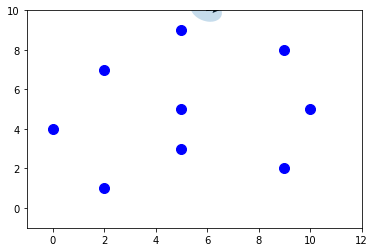

[ 6.05690757 10.03873424  0.12380417]


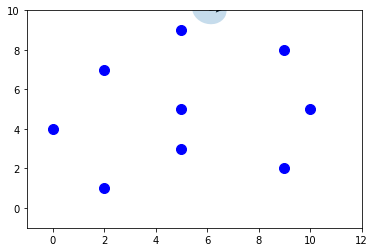

[ 6.18175836 10.05964615  0.12875194]


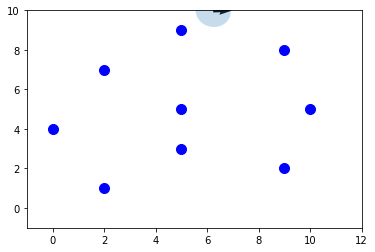

[6.33189665 9.96256343 0.03641553]


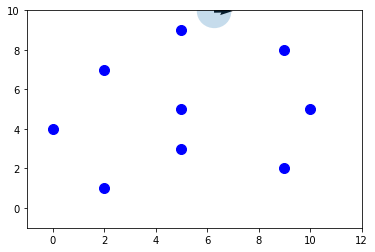

[ 6.36407533e+00  9.94632038e+00 -4.15961028e-03]


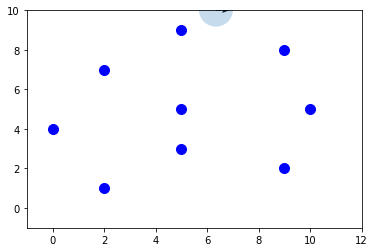

[ 6.43690534 10.0487711   0.04809256]


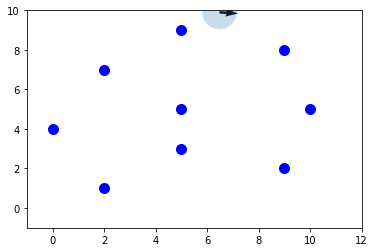

[ 6.57500107  9.88999253 -0.11150602]


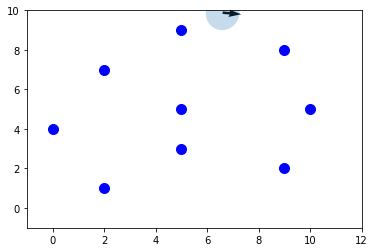

[ 6.69909968  9.87163838 -0.14407447]


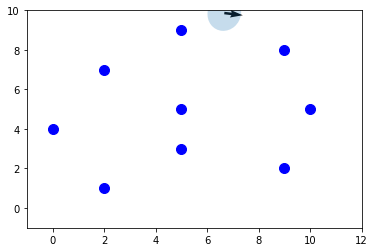

[ 6.76254001  9.8473414  -0.18509597]


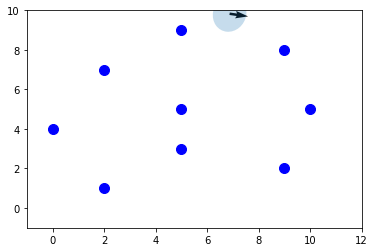

[ 6.96741921  9.80934303 -0.21737261]


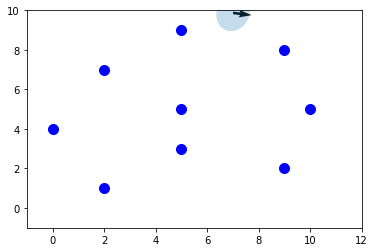

[ 7.1022204   9.8546973  -0.19002902]


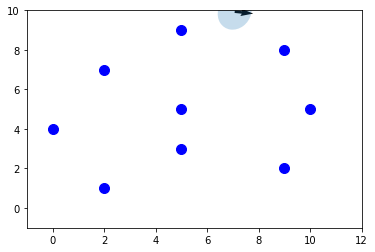

[ 7.16557607  9.91828863 -0.16223543]


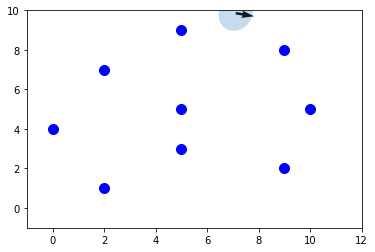

[ 7.2060532   9.83492027 -0.25050955]


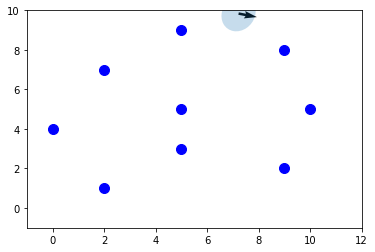

[ 7.31426654  9.81244624 -0.27698662]


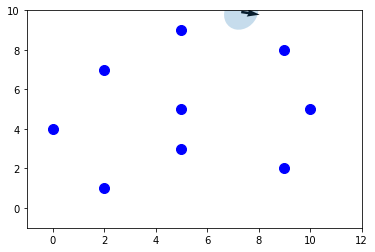

[ 7.41819706  9.89869779 -0.21931881]


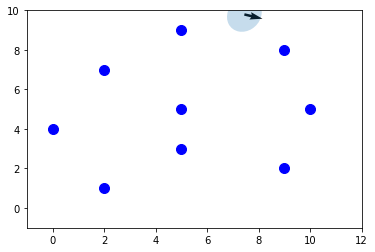

[ 7.53770196  9.7630555  -0.32987744]


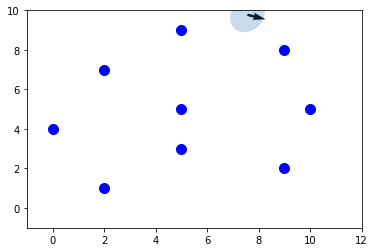

[ 7.65550456  9.74373105 -0.34482883]


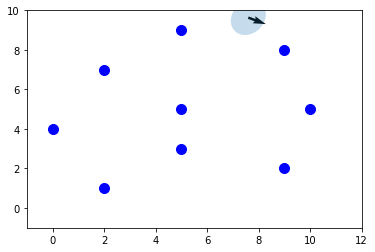

[ 7.68505771  9.58762405 -0.47981756]


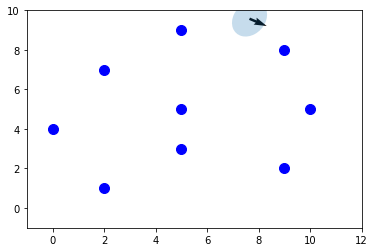

[ 7.72967062  9.52595091 -0.53407103]


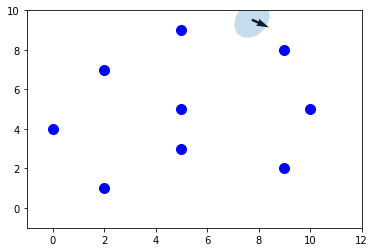

[ 7.82054075  9.47557324 -0.56003452]


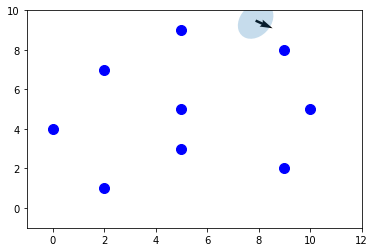

[ 7.96489579  9.42862925 -0.56104237]


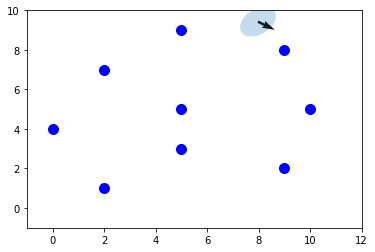

[ 8.05431736  9.37301211 -0.59028916]


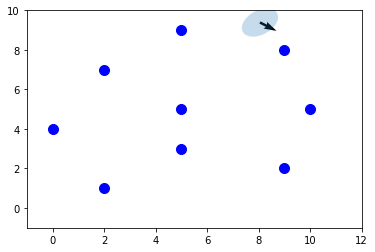

[ 8.13033281  9.33063068 -0.61467401]


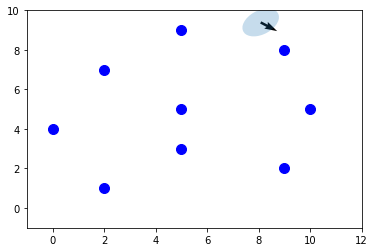

[ 8.15811064  9.33065976 -0.63183718]


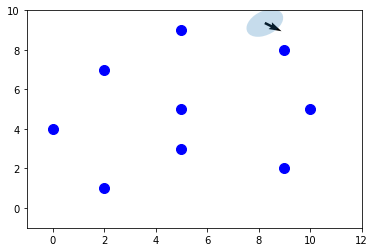

[ 8.32017468  9.30599095 -0.60088226]


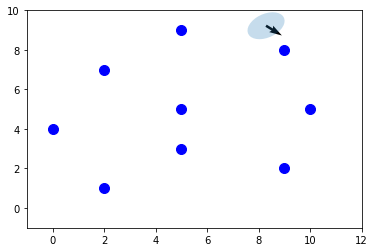

[ 8.36128592  9.15905271 -0.70736968]


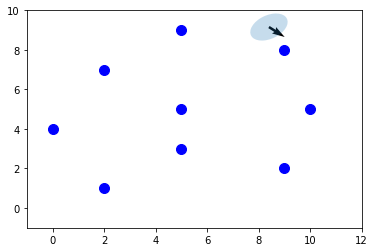

[ 8.47327633  9.09182636 -0.72068382]


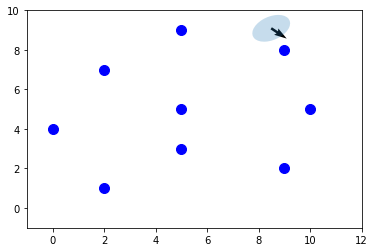

[ 8.55957277  9.02607819 -0.74359627]


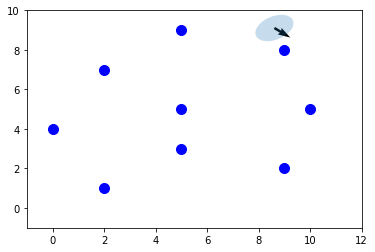

[ 8.68629379  9.04484462 -0.69490558]


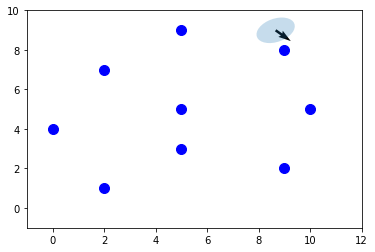

[ 8.72932014  8.92252235 -0.77571217]


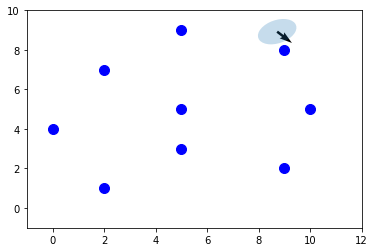

[ 8.78610162  8.85066972 -0.81321059]


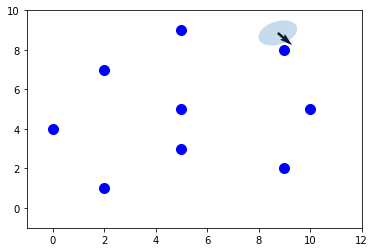

[ 8.80803937  8.78113579 -0.86602621]


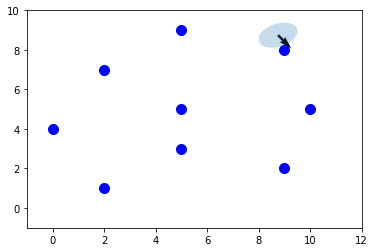

[ 8.81062796  8.6668761  -0.95105467]


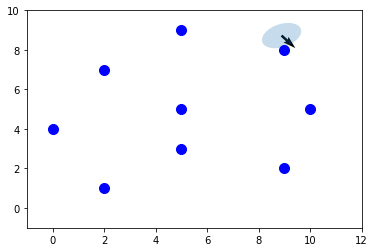

[ 8.94960953  8.64798622 -0.90004346]


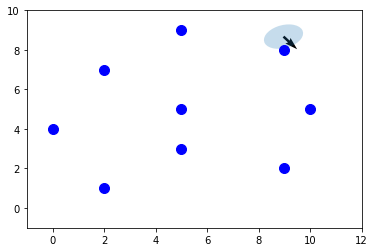

[ 9.02501514  8.59452268 -0.90899602]


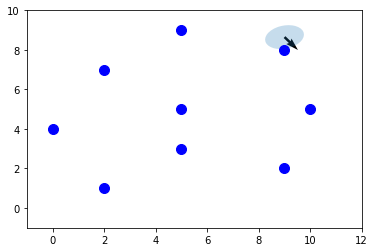

[ 9.06293438  8.56908492 -0.9275486 ]


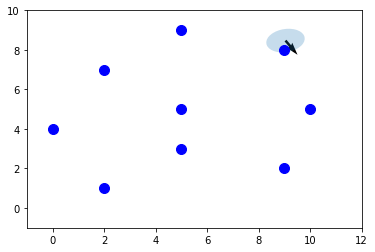

[ 9.09259022  8.38708213 -1.02572321]


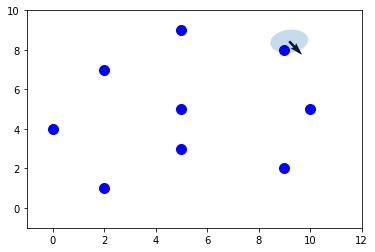

[ 9.24149945  8.35173955 -0.96837517]


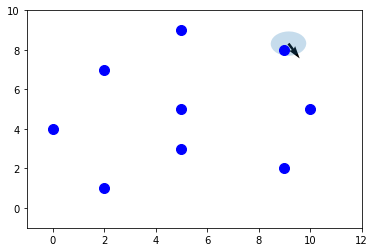

[ 9.20437683  8.23156686 -1.07646612]


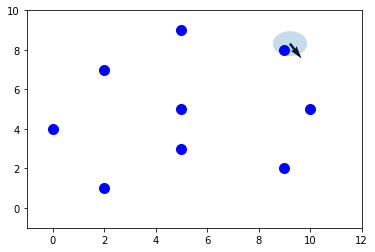

[ 9.26210921  8.2294586  -1.06327205]


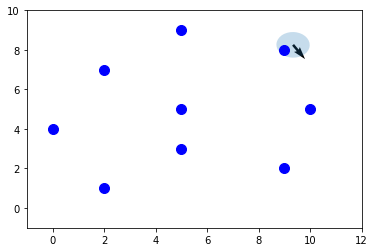

[ 9.38628724  8.17061167 -1.02785067]


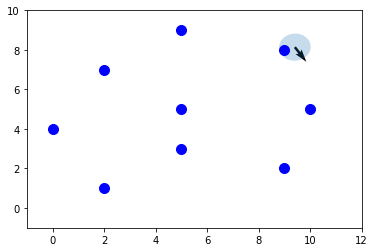

[ 9.45393566  8.05269577 -1.05846665]


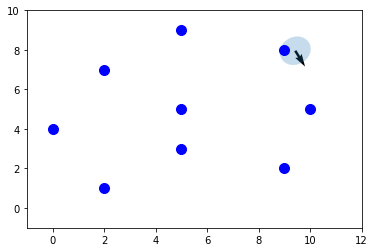

[ 9.4600815   7.86632883 -1.15772928]


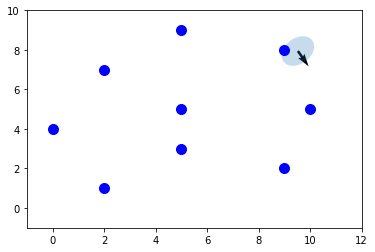

[ 9.56714792  7.85406033 -1.10987433]


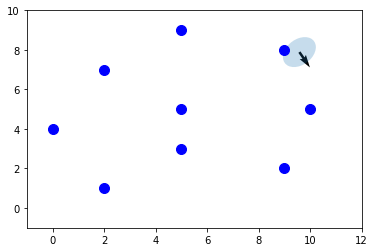

[ 9.62472968  7.79994449 -1.11624767]


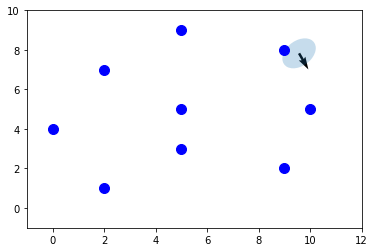

[ 9.60585082  7.73380236 -1.18366662]


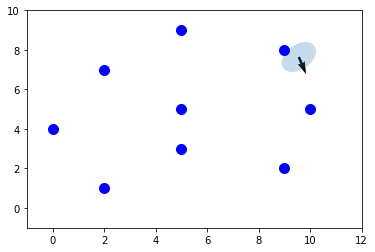

[ 9.58637923  7.544196   -1.28517008]


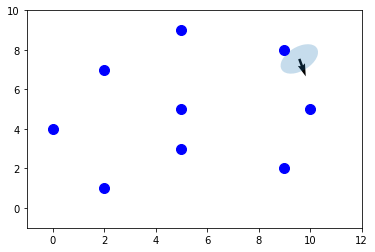

[ 9.60200076  7.44595107 -1.32590669]


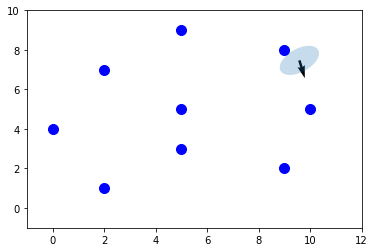

[ 9.60019363  7.37159935 -1.37173682]


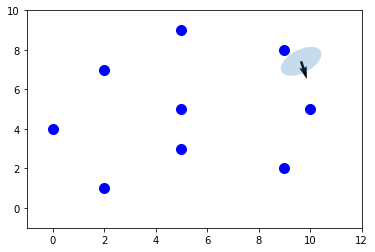

[ 9.6685894   7.32347797 -1.35586303]


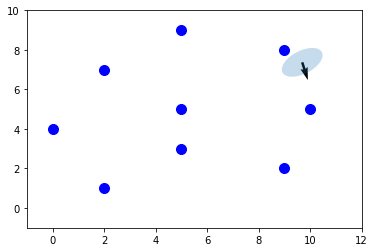

[ 9.71113176  7.2730471  -1.3617719 ]


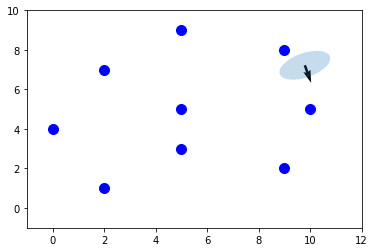

[ 9.81588632  7.1249731  -1.33255855]


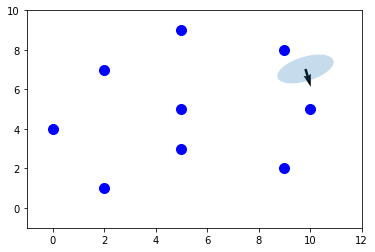

[ 9.83585628  6.93637605 -1.37728075]


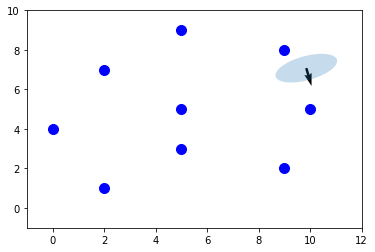

[ 9.86759701  6.97922904 -1.37972832]


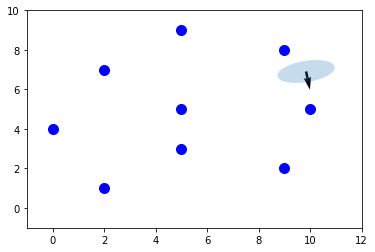

[ 9.85404008  6.80877315 -1.44090267]


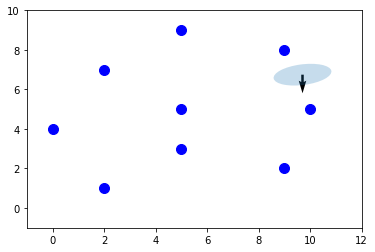

[ 9.69960494  6.6463883  -1.56957832]


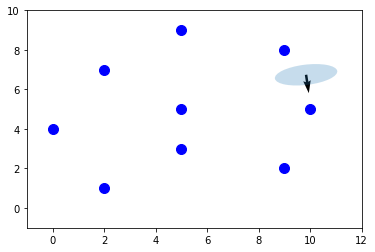

[ 9.84937037  6.64207617 -1.45742677]


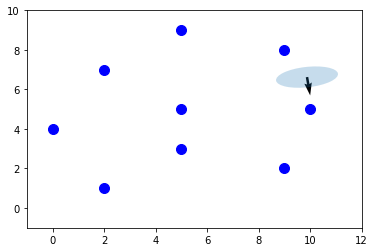

[ 9.8878721   6.52458258 -1.43780464]


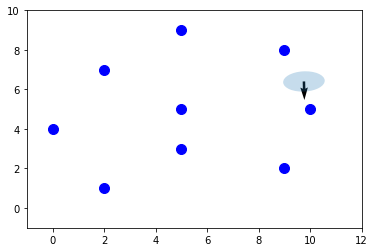

[ 9.7569421   6.30397948 -1.55205662]


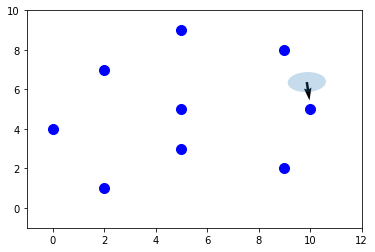

[ 9.87852086  6.27219156 -1.45852126]


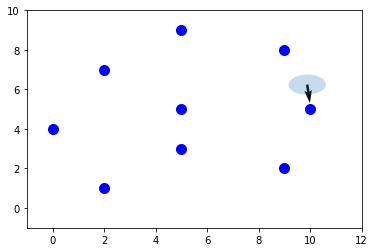

[ 9.89371646  6.14478619 -1.45789579]


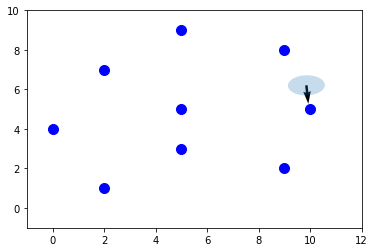

[ 9.85808298  6.10801888 -1.48957862]


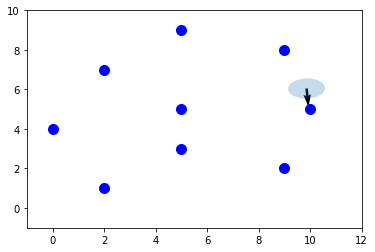

[ 9.86616061  5.94703906 -1.49289925]


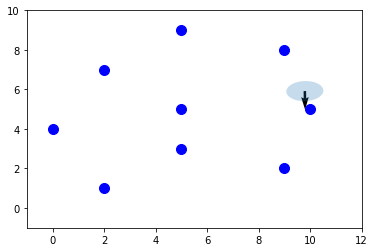

[ 9.79171744  5.81706652 -1.56027836]


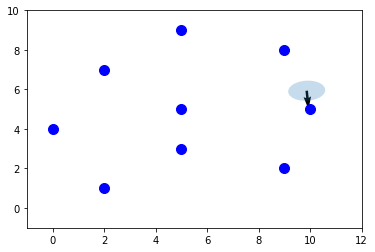

[ 9.87036789  5.83483881 -1.49364172]


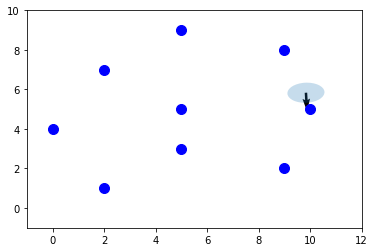

[ 9.83751405  5.73341328 -1.52651543]


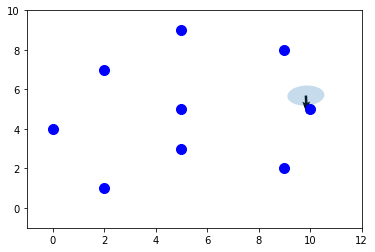

[ 9.83488352  5.59001598 -1.53413888]


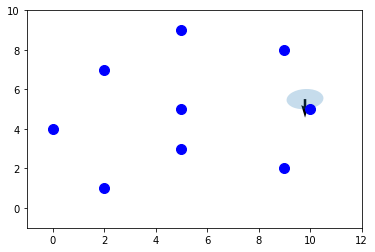

[ 9.79681874  5.41088934 -1.5720129 ]


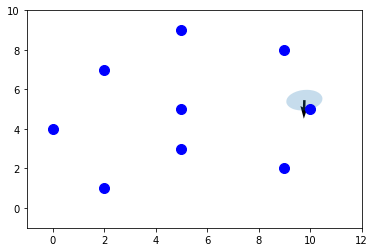

[ 9.7698953   5.35845795 -1.59354894]


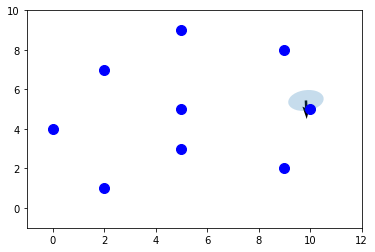

[ 9.83616956  5.34219757 -1.54054248]


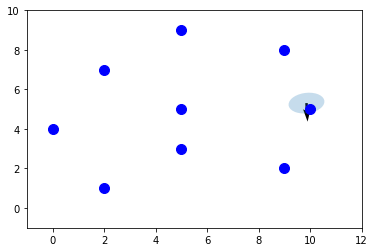

[ 9.85869417  5.20933055 -1.52513966]


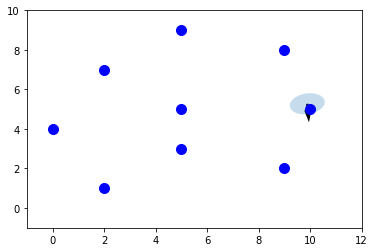

[ 9.89159025  5.17416329 -1.49951995]


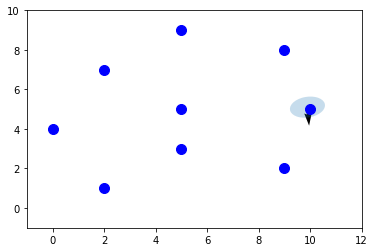

[ 9.89844589  5.0038307  -1.50320432]


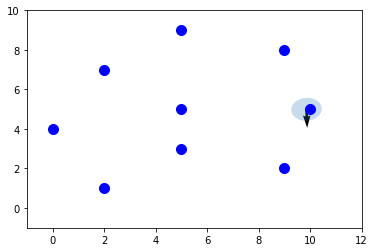

[ 9.85739338  4.89542072 -1.54232594]


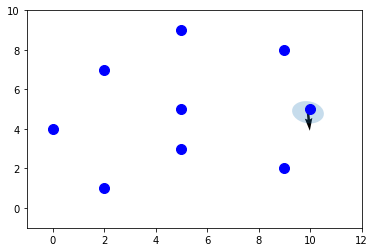

[ 9.91997333  4.74429482 -1.49527384]


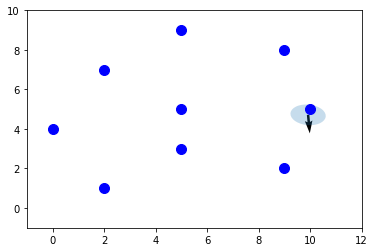

[ 9.92372062  4.61441836 -1.50007557]


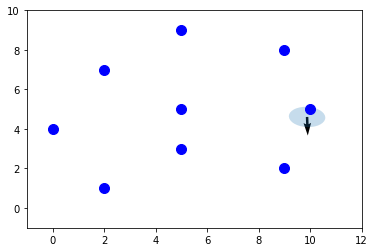

[ 9.88010776  4.50794965 -1.54207025]


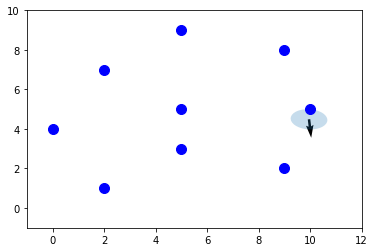

[ 9.96132177  4.38968969 -1.48032125]


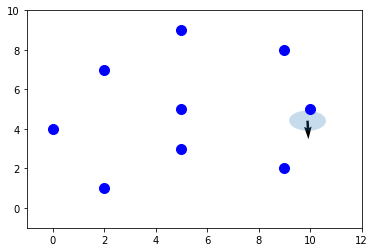

[ 9.89940227  4.31851402 -1.53596212]


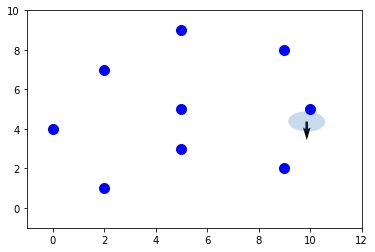

[ 9.86294543  4.27558484 -1.5655152 ]


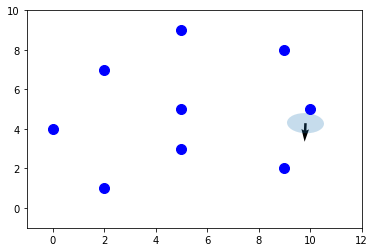

[ 9.81164871  4.1922319  -1.60647056]


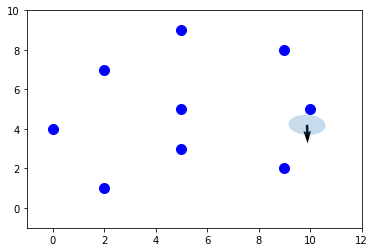

[ 9.87872596  4.10694975 -1.55069685]


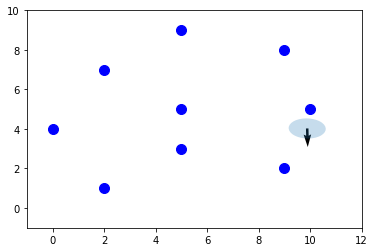

[ 9.88422643  3.92573229 -1.54967519]


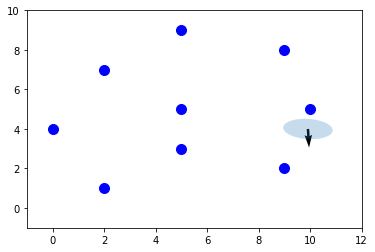

[ 9.91596349  3.89863549 -1.52451108]


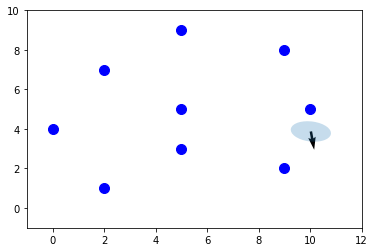

[10.03812949  3.77457382 -1.43358726]


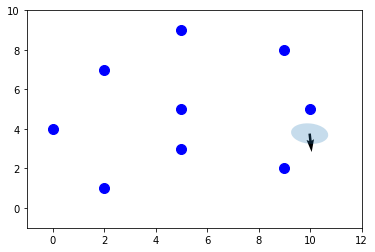

[ 9.98494614  3.66586843 -1.48786981]


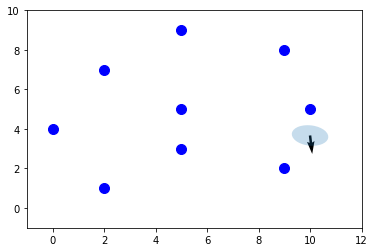

[10.00136025  3.57094807 -1.48185639]


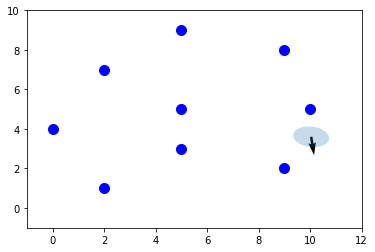

[10.04765032  3.50467957 -1.44865442]


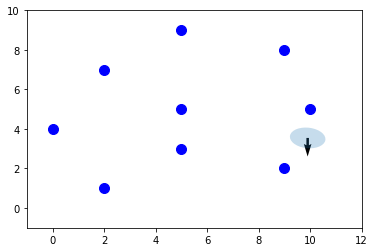

[ 9.89986957  3.44612059 -1.57282971]


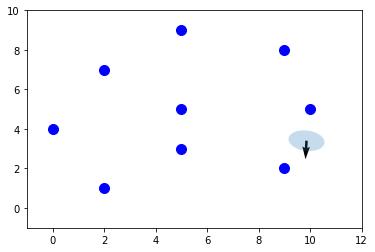

[ 9.85061671  3.30727429 -1.61411293]


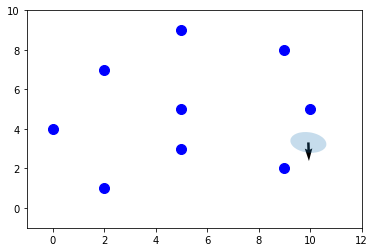

[ 9.92964449  3.21876548 -1.54674204]


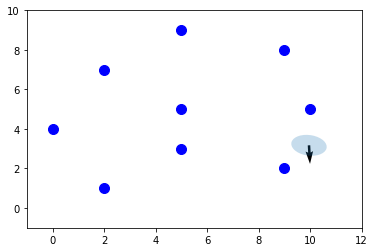

[ 9.9556737   3.07264428 -1.52980908]


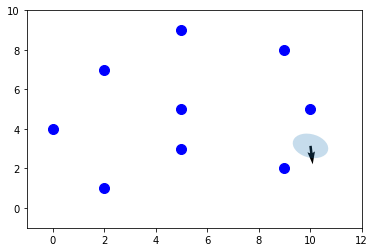

[10.01904542  3.0455676  -1.47927352]


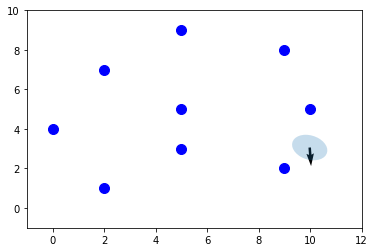

[ 9.98467292  2.96078287 -1.51346177]


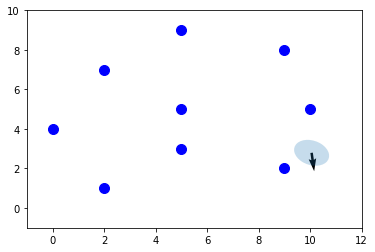

[10.0637061   2.69472922 -1.46348525]


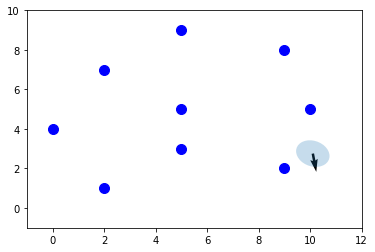

[10.11449982  2.65509576 -1.42512985]


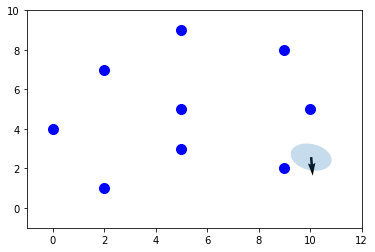

[10.04119666  2.47526903 -1.50483956]


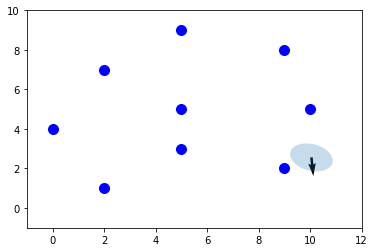

[10.0543647   2.46075859 -1.49239713]


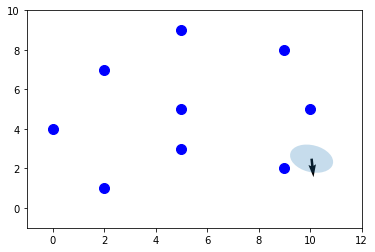

[10.06007581  2.39794459 -1.49131867]


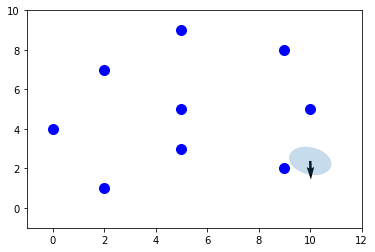

[10.0026475   2.28227055 -1.54419243]


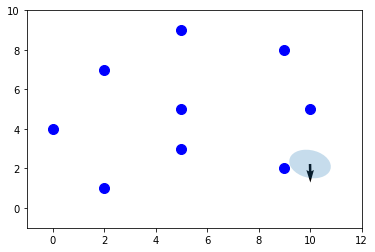

[ 9.99346132  2.1278867  -1.55691947]


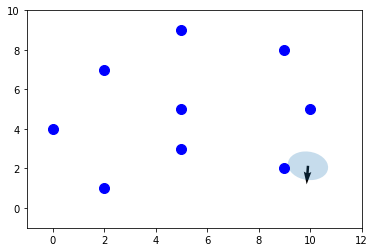

[ 9.90690942  2.0371476  -1.62610774]


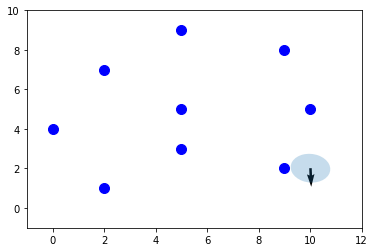

[10.01178695  1.91581314 -1.54011665]


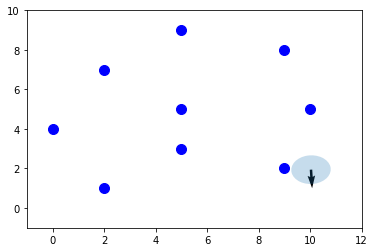

[10.03392775  1.84126866 -1.52368523]


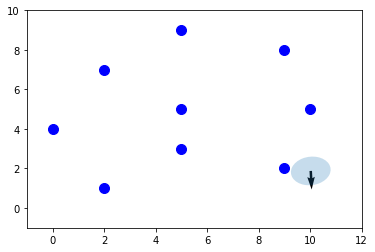

[10.02406048  1.77687372 -1.53500705]


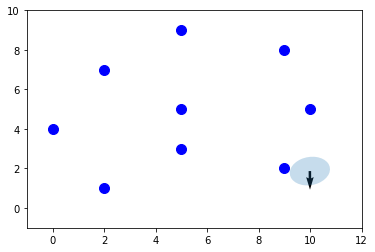

[ 9.98641851  1.76955273 -1.76542618]


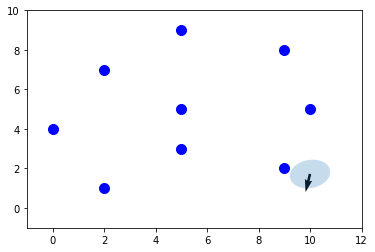

[ 9.97230214  1.62473737 -1.95524016]


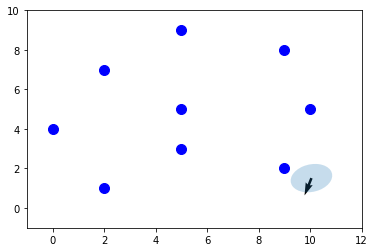

[10.01745432  1.41813786 -2.06483496]


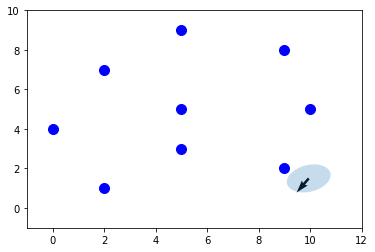

[ 9.88601492  1.4140953  -2.3527227 ]


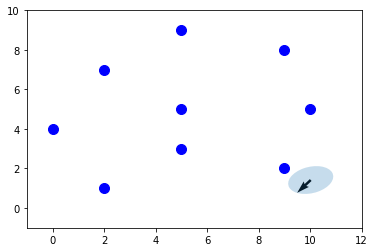

[ 9.9546311   1.33856705 -2.45293092]


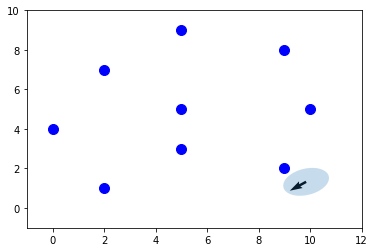

[ 9.7583752   1.26795456 -2.72536977]


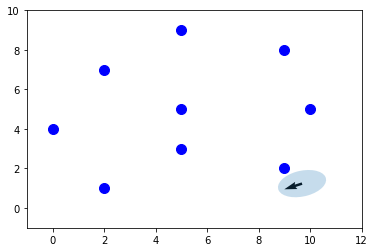

[ 9.58890375  1.19689146 -2.94741893]


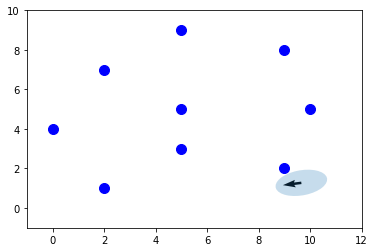

[ 9.55600925  1.2581215  -3.18217799]


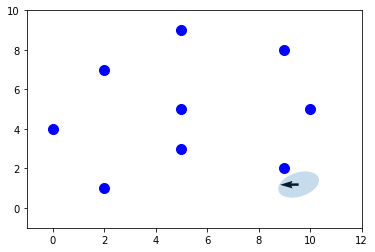

[ 9.44956694  1.18588458 -3.17477317]


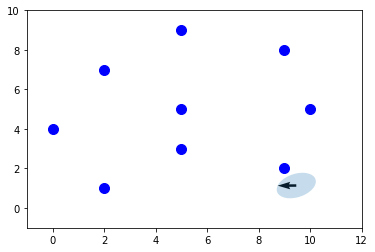

[ 9.35804969  1.13750202 -3.13267898]


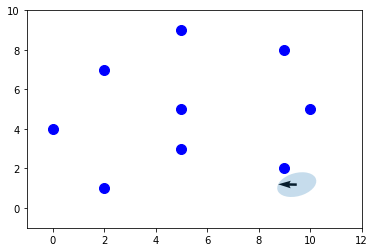

[ 9.37612332  1.1868683  -3.16386388]


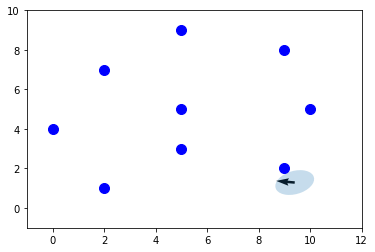

[ 9.29830615  1.30121668 -3.25554666]


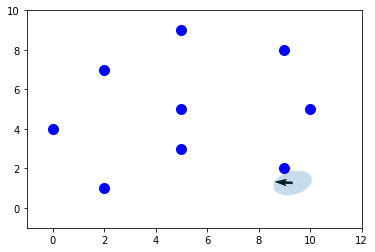

[ 9.21915834  1.27672064 -3.22604851]


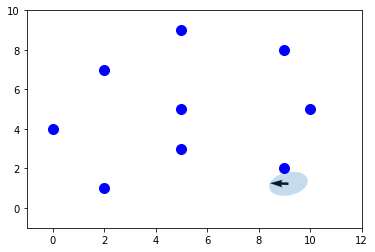

[ 9.0547942   1.23244881 -3.18039873]


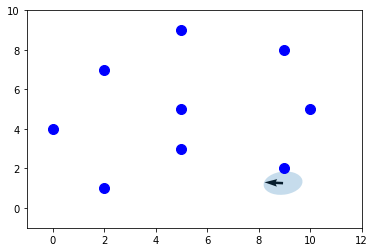

[ 8.8449139   1.26422045 -3.20225929]


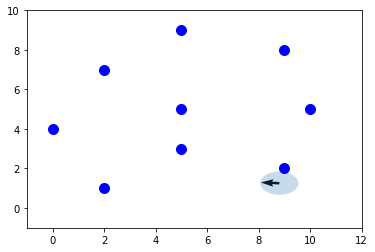

[ 8.70013517  1.26160824 -3.19417618]


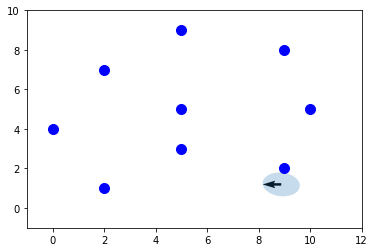

[ 8.77390707  1.19461941 -3.14137644]


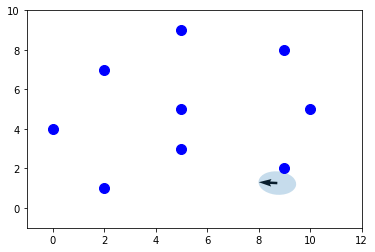

[ 8.62238706  1.26859636 -3.20139534]


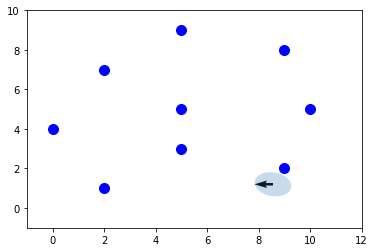

[ 8.45399769  1.20224192 -3.13963408]


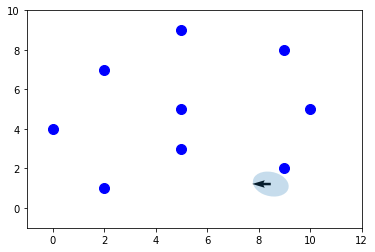

[ 8.36797727  1.21371499 -3.15126469]


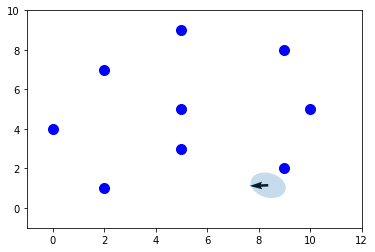

[ 8.26772661  1.1464577  -3.09528967]


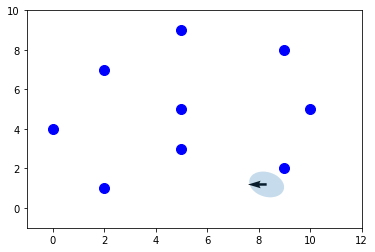

[ 8.20758131  1.19261078 -3.13686496]


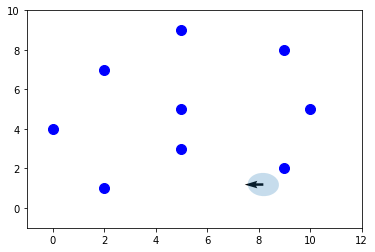

[ 8.07905703  1.18866865 -3.13520498]


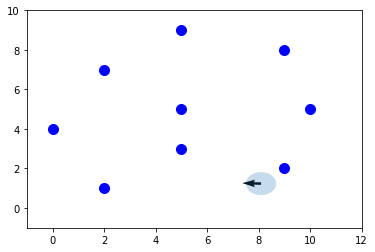

[ 7.98914091  1.23868395 -3.17659658]


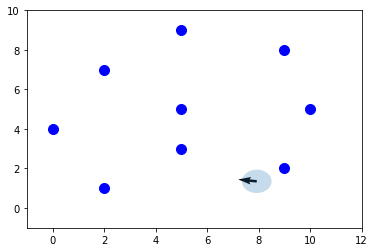

[ 7.8233585   1.36308264 -3.2752582 ]


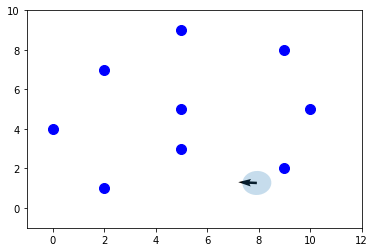

[ 7.82709834  1.27332299 -3.19849658]


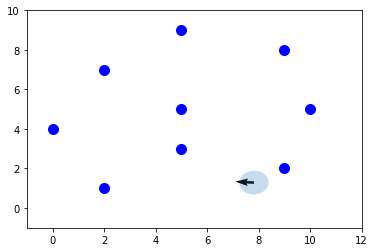

[ 7.71446839  1.29317247 -3.21090416]


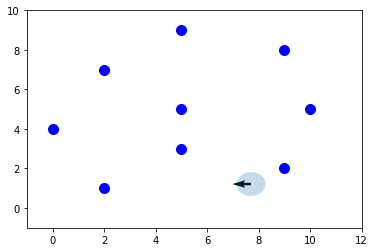

[ 7.60063098  1.21386233 -3.13857392]


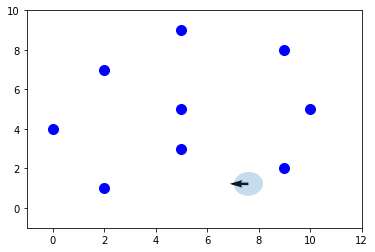

[ 7.49787125  1.22192574 -3.14509097]


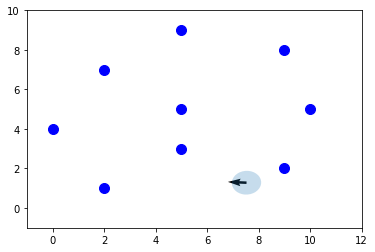

[ 7.42578142  1.28677429 -3.19968478]


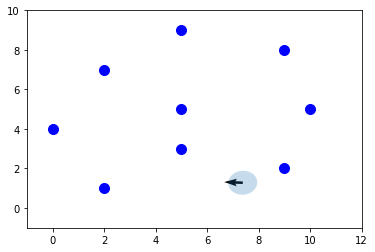

[ 7.27999455  1.28421482 -3.19150869]


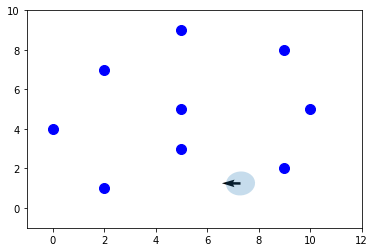

[ 7.19247948  1.24443894 -3.15545604]


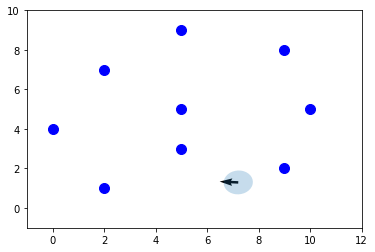

[ 7.10477391  1.30162555 -3.2019491 ]


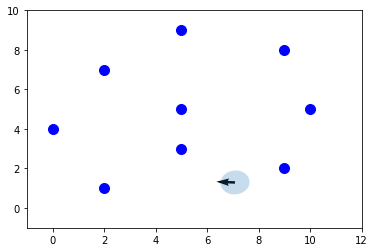

[ 6.97897612  1.29857456 -3.19417496]


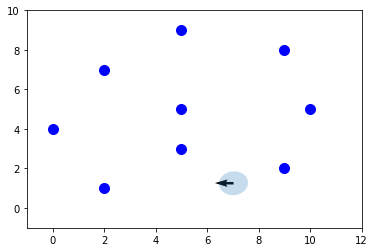

[ 6.92030486  1.25489828 -3.15592781]


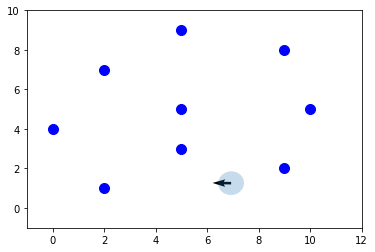

[ 6.8275892   1.25865701 -3.15643992]


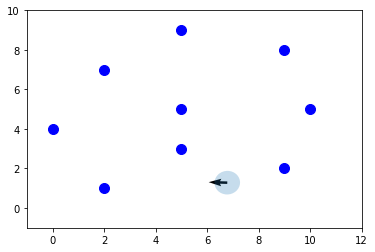

[ 6.67847972  1.28642539 -3.17749545]


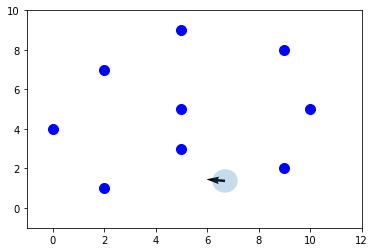

[ 6.59088539  1.38277954 -3.25280042]


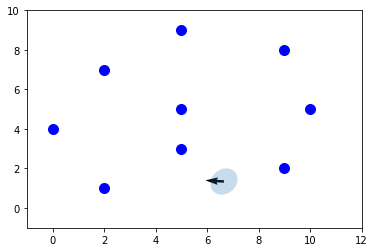

[ 6.5494441   1.35018069 -3.2218245 ]


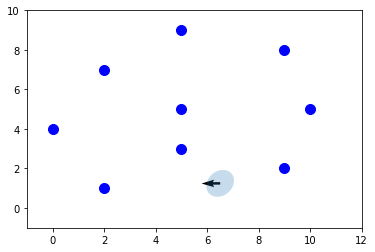

[ 6.40316789  1.24704854 -3.12860002]


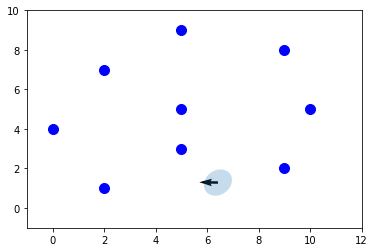

[ 6.31547927  1.29098312 -3.16572423]


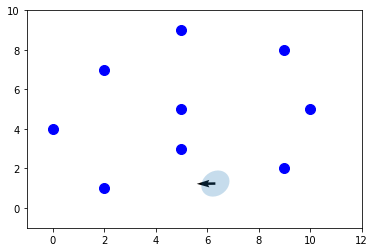

[ 6.21673458  1.23684719 -3.12012   ]


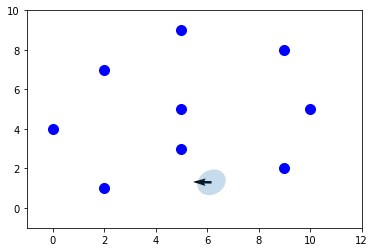

[ 6.06792402  1.30174621 -3.17480862]


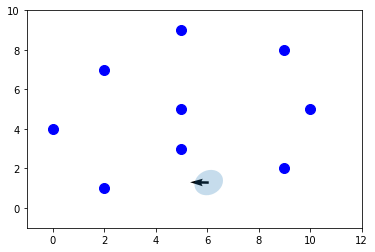

[ 5.95907639  1.29025923 -3.16327418]


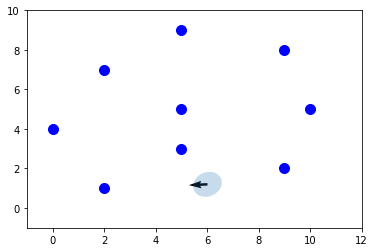

[ 5.90867691  1.1938593  -3.08372984]


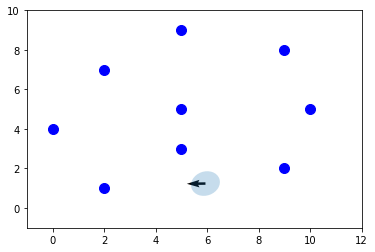

[ 5.831586    1.23681579 -3.12236698]


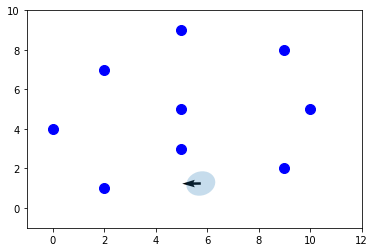

[ 5.65036361  1.23976    -3.12767966]


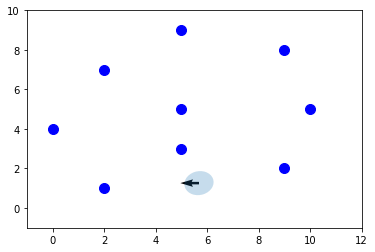

[ 5.58084514  1.26028798 -3.14531643]


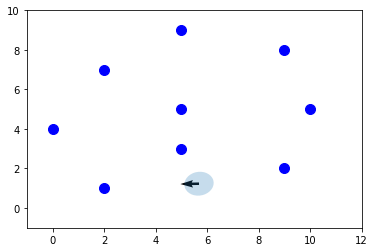

[ 5.58174771  1.22797758 -3.31771799]


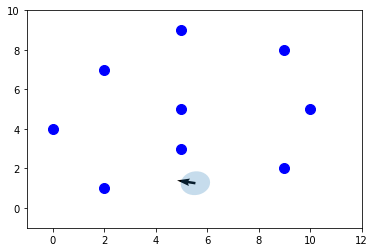

[ 5.44384614  1.27528798 -3.53848678]


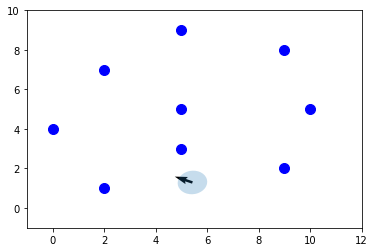

[ 5.33414922  1.33352229 -3.75275682]


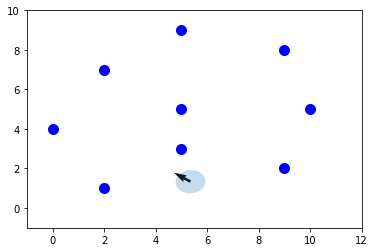

[ 5.26694758  1.39182935 -3.95917239]


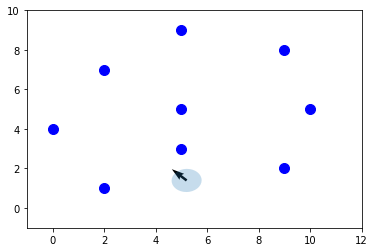

[ 5.1287369   1.46616663 -4.12263833]


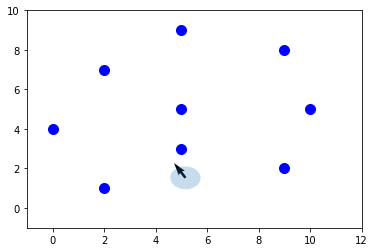

[ 5.10352381  1.61393792 -4.37503262]


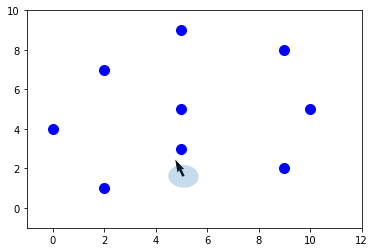

[ 5.04274647  1.70182737 -4.55537967]


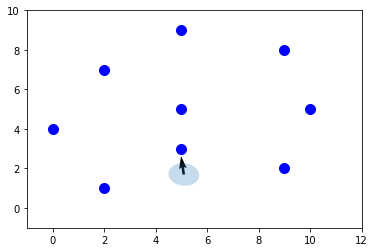

[ 5.0794192   1.79568007 -4.74460872]


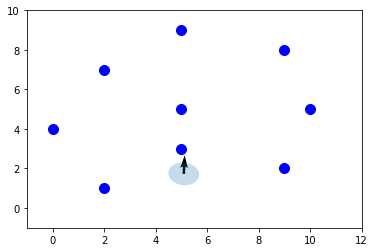

[ 5.09358423  1.82562331 -4.7484779 ]


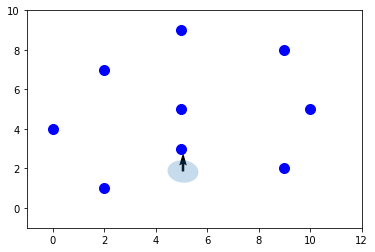

[ 5.05908957  1.94959881 -4.71716881]


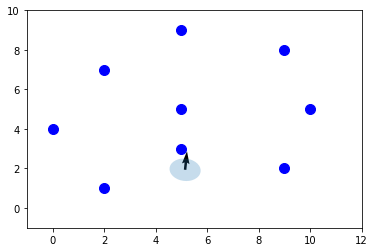

[ 5.14857043  2.03456177 -4.78947762]


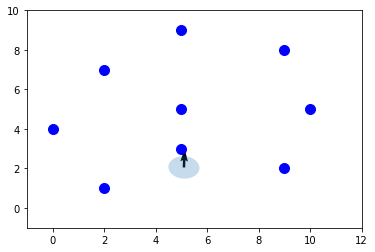

[ 5.0982582   2.15304591 -4.74100701]


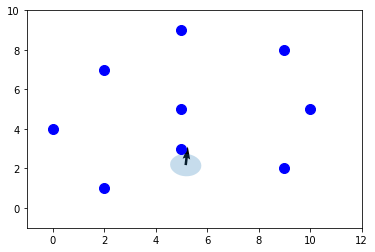

[ 5.17323379  2.27168807 -4.80056953]


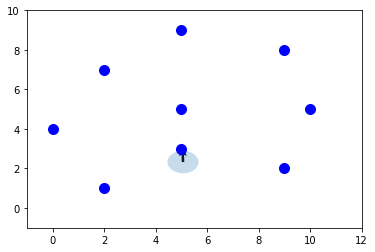

[ 5.05737213  2.42634657 -4.69460403]


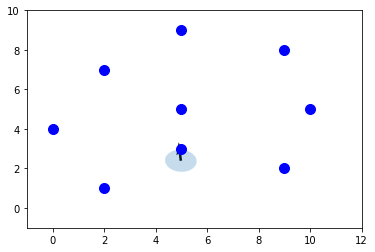

[ 4.96658532  2.49013584 -4.62165819]


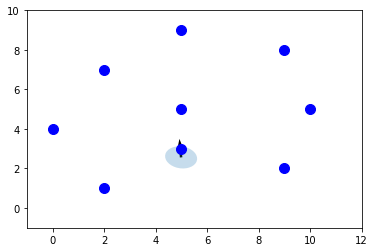

[ 4.97897667  2.66083134 -4.6421103 ]


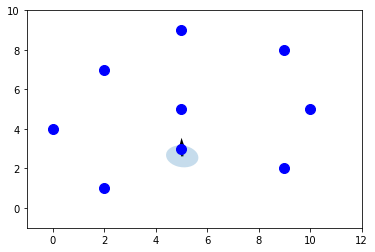

[ 5.02579625  2.71373733 -4.6828203 ]


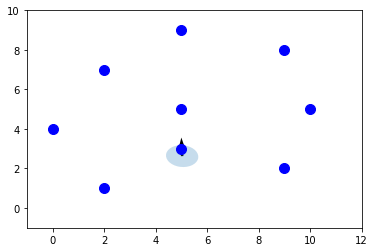

[ 5.0229735   2.72600901 -4.68014268]


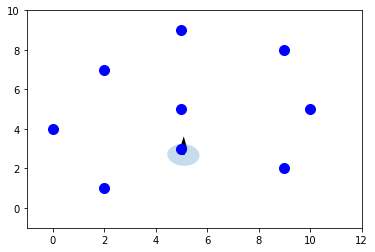

[ 5.07722772  2.78539749 -4.72561557]


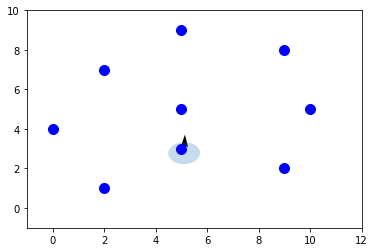

[ 5.10584253  2.87659844 -4.74855051]


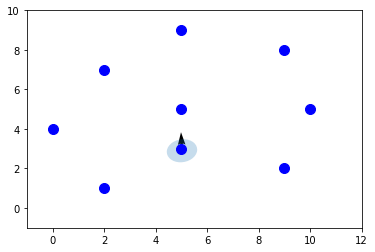

[ 5.0157778   2.99736211 -4.67298269]


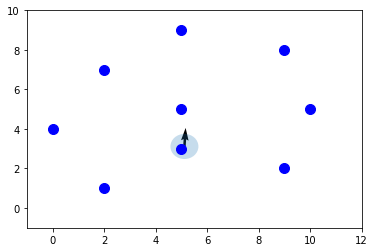

[ 5.11921681  3.2140812  -4.76072543]


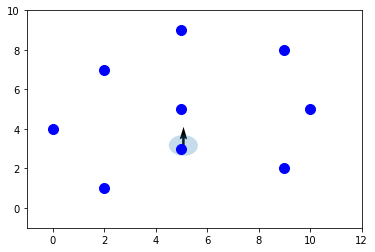

[ 5.07409785  3.26594612 -4.72037141]


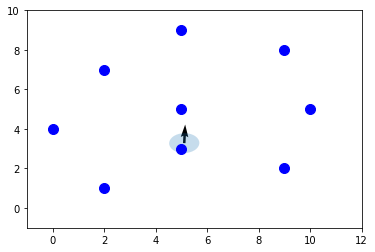

[ 5.11143547  3.38410522 -4.75096651]


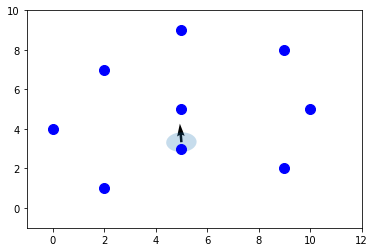

[ 4.99048599  3.43030462 -4.65023362]


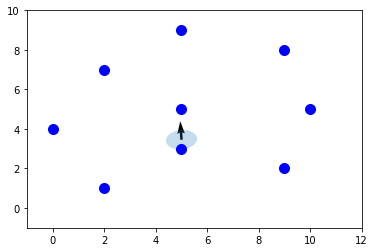

[ 4.99612502  3.55569396 -4.66010731]


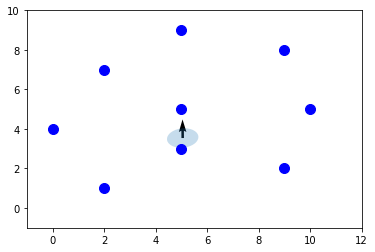

[ 5.04662725  3.64180954 -4.70427619]


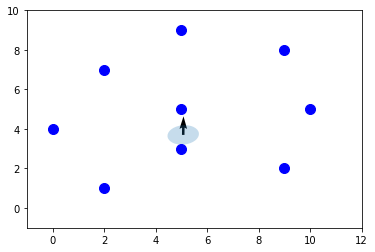

[ 5.06869684  3.7993456  -4.72341126]


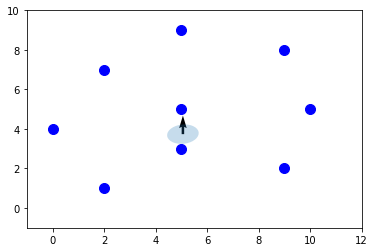

[ 5.05590747  3.8375156  -4.71227915]


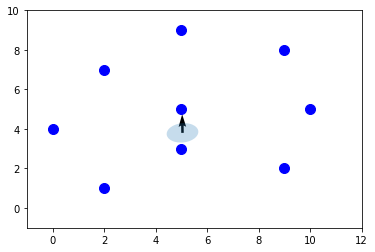

[ 5.03832362  3.90293384 -4.69788017]


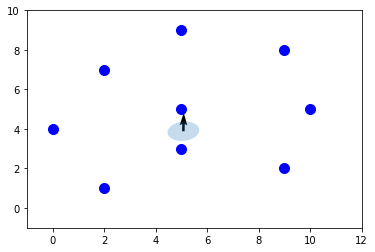

[ 5.07446971  3.98393157 -4.72909216]


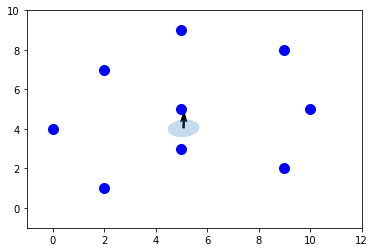

[ 5.08315344  4.12905223 -4.73426495]


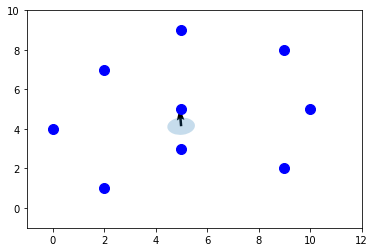

[ 4.98026231  4.23873076 -4.64807507]


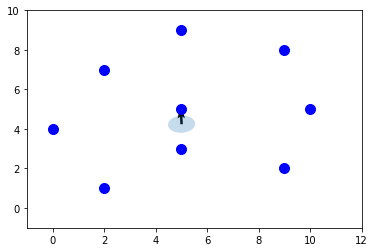

[ 5.00125692  4.3382179  -4.67122271]


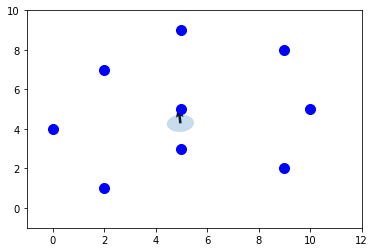

[ 4.95030015  4.38458451 -4.63035642]


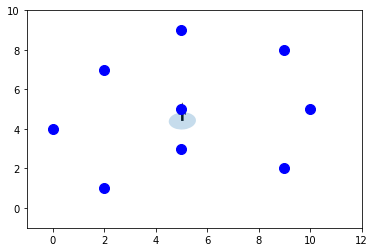

[ 5.03354288  4.50578029 -4.70628676]


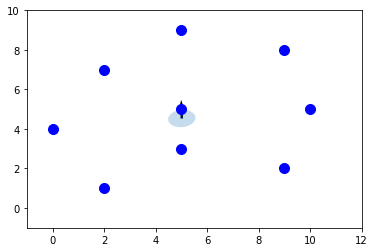

[ 5.00974052  4.62791927 -4.68720172]


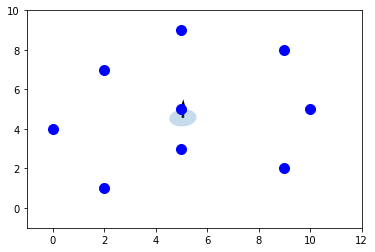

[ 5.05720796  4.65950326 -4.72785239]


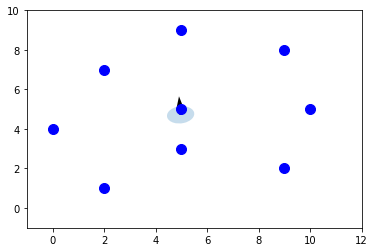

[ 4.95981403  4.81552954 -4.64489737]


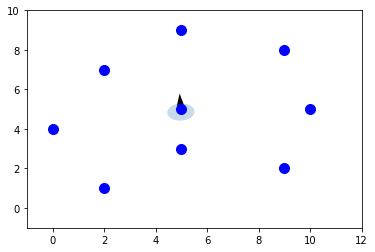

[ 4.97124976  4.95471289 -4.65983031]


In [4]:
# =======================================================================
#
# Filtro de Kalman Extendido para la estimación de posición/orientación
#
# =======================================================================

print("Leyendo posiciones de landmarks")
landmarks = leer_landmarks("data_landmarks.dat")

print("Leyendo datos del sensor")
sensor = leer_sensor_odom("data_sensor.dat")

# Estado inicial
X = [0.0, 0.0, 0.0]
# Matriz de covarianza inicial
P = np.array([[1.0, 0.0, 0.0],
              [0.0, 1.0, 0.0],
              [0.0, 0.0, 1.0]])
# Límites del mapa
map_limits = [-1, 12, -1, 10]

# t es el "tiempo"
#for t in range(10):
for t in range(int(len(sensor)/2)):
    # Gráfico del estado actual
    plot_robot(X, P, landmarks, map_limits)
    # Predicción con EKF
    X, P = prediccion_ekf(sensor[t,'odom'], X, P)
    print(X)
    # Corrección con EKF
    X, P = correccion_ekf(sensor[t, 'sensor'], X, P, landmarks)
plt.show('hold')
